<a href="https://colab.research.google.com/github/Abhilash-Bee/MachineLearning_DeepLearning_Projects/blob/main/Classification/Ecommerce_Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecommerce Customer Churn Analysis and Prediction**

### **Description:**
 The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

 **Data Variable Description**
* `CustomerID` Unique customer ID
* `Churn` Churn Flag
* `Tenure` Tenure of customer in organization
* `PreferredLoginDevice` Preferred login device of customer
* `CityTier` City tier
* `WarehouseToHome` Distance in between warehouse to home of customer
* `PreferredPaymentMode` Preferred payment method of customer
* `Gender` Gender of customer
* `HourSpendOnApp` Number of hours spend on mobile application or website
* `NumberOfDeviceRegistered` Total number of deceives is registered on particular customer
* `PreferedOrderCat` Preferred order category of customer in last month
* `SatisfactionScore` Satisfactory score of customer on service
* `MaritalStatus` Marital status of customer
* `NumberOfAddress` Total number of added added on particular customer
* `Complain` Any complaint has been raised in last month
* `OrderAmountHikeFromlastYear` Percentage increases in order from last year
* `CouponUsed` Total number of coupon has been used in last month
* `OrderCount` Total number of orders has been places in last month
* `DaySinceLastOrder` Day Since last order by customer
* `CashbackAmount` Average cashback in last month

---
---

## Getting the data and importing dependencies with helper function

In [ ]:
import zipfile

filedir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/2. Customer Churn/E Commerce Dataset.zip'

with zipfile.ZipFile(filedir, 'r') as file:
    file.extractall()

In [ ]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py

--2024-03-01 13:01:52--  https://raw.githubusercontent.com/Abhilash-Bee/MachineLearning_DeepLearning_Projects/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8016 (7.8K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.83K  --.-KB/s    in 0s      

2024-03-01 13:01:52 (62.2 MB/s) - ‘helper_function.py’ saved [8016/8016]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helper_function import *

In [ ]:
data_dir = '/content/E Commerce Dataset/E Comm-Table 1.csv'

df = pd.read_csv(data_dir)
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

## EDA (Exploratory Data Analysis)

In [ ]:
df.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.221492    49.193869      0.0   

                                  25%      50%       75%      max  
CustomerID                   51408.25  52815.5  54222.75  55630.0  
Churn                            0.00      0.0      0.00      1.0  
Tenure                           2.00      9.0     16.00     61.0  
CityTier                         1.00      1.0      3.00      3.0  
WarehouseToHome                  9.00     14.0     20.00    127.0  
HourSpendOnApp                   2.00      3.0      3.00      5.0  
NumberOfDeviceRegistered         3.00      4.0      4.00      6.0  
SatisfactionScore                2.00      3.0      4.00      5.0  
NumberOfAddress                  2.00      3.0      6.00     22.0  
Complain                         0.00      0.0      1.00      1.0  
OrderAmountHikeFromlastYear     13.00     15.0     18.00     26.0  
CouponUsed                       1.00      1.0      2.00     16.0  
OrderCount                       1.00      2.0      3.00     16.0  
DaySinceLastOrder                2.00      3.0      7.00     46.0  
CashbackAmount                 146.00    163.0    196.00    325.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Univariate Analysis

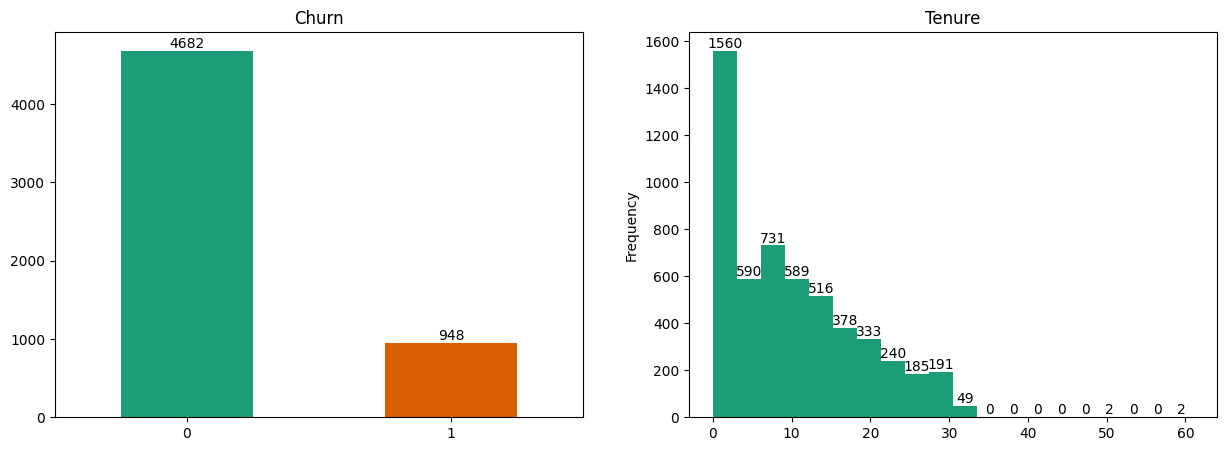

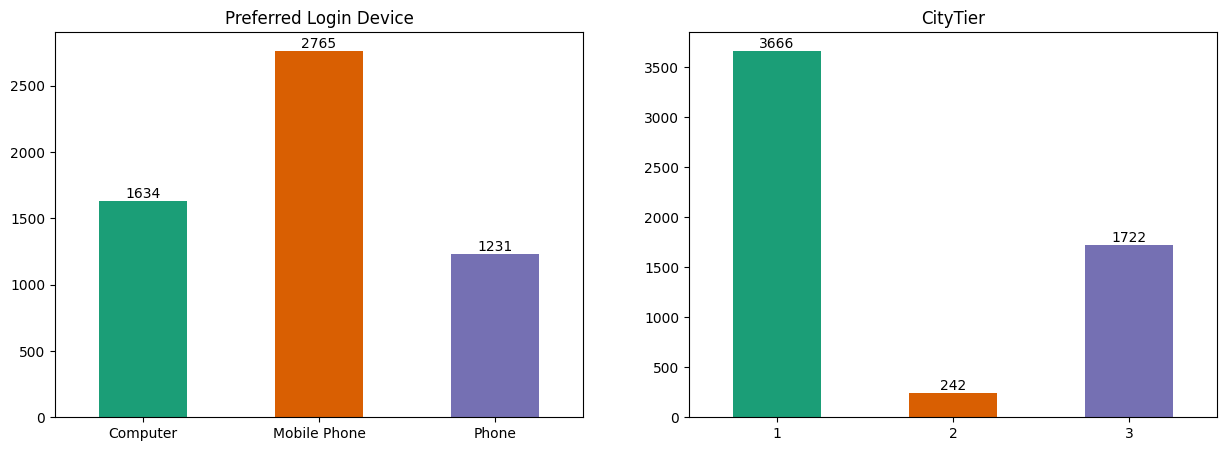

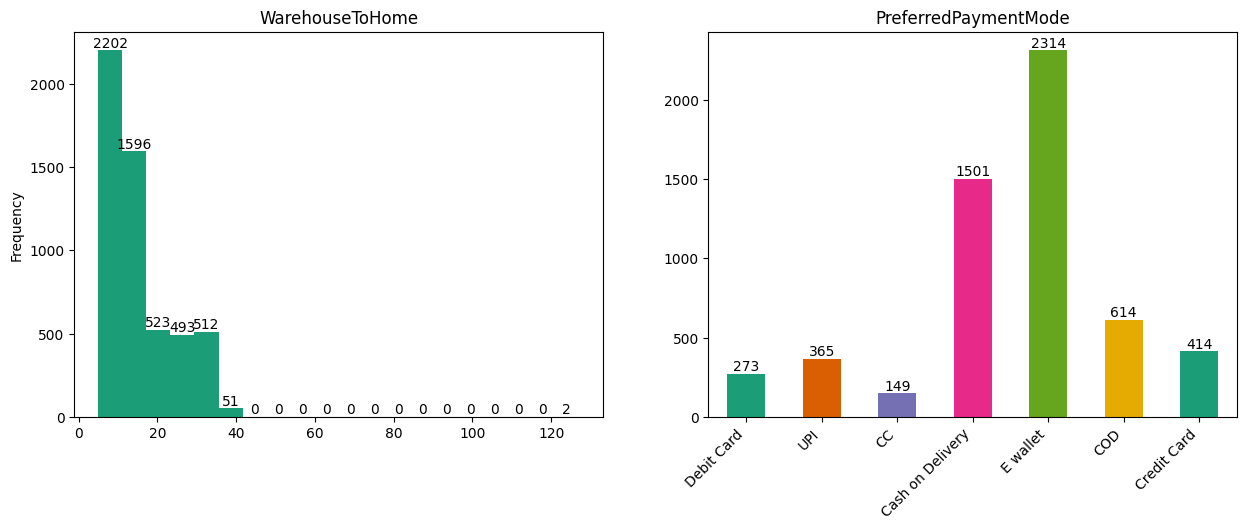

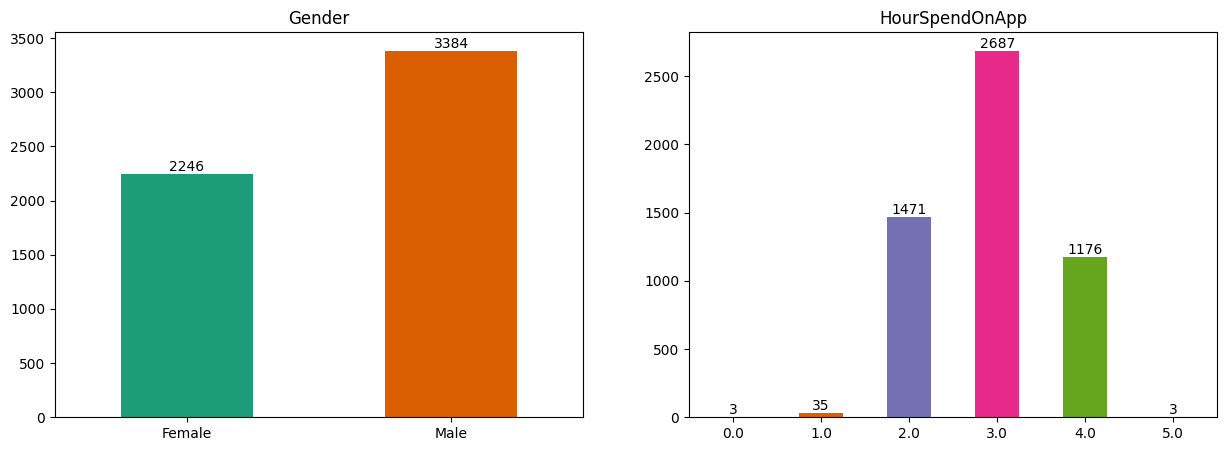

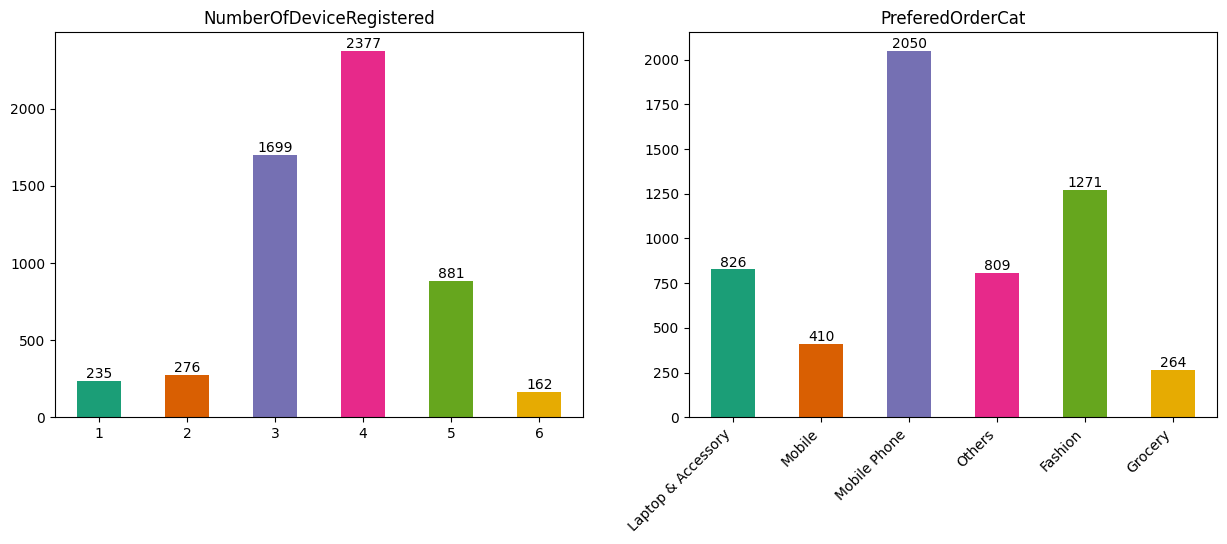

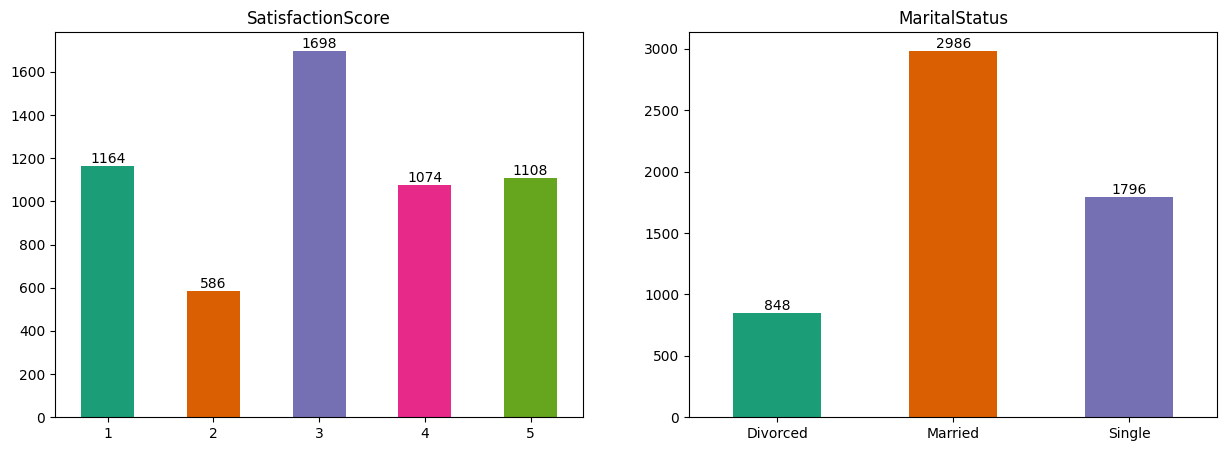

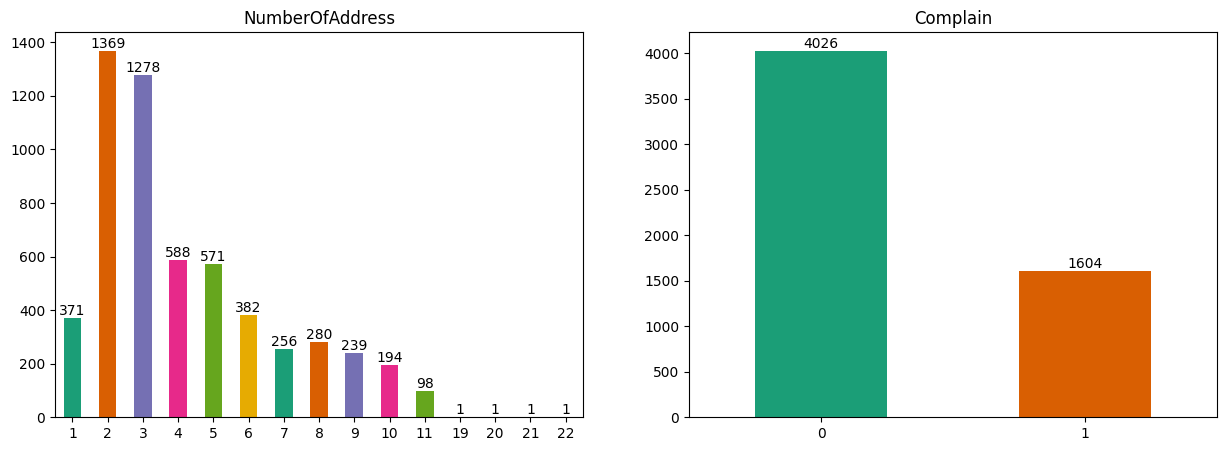

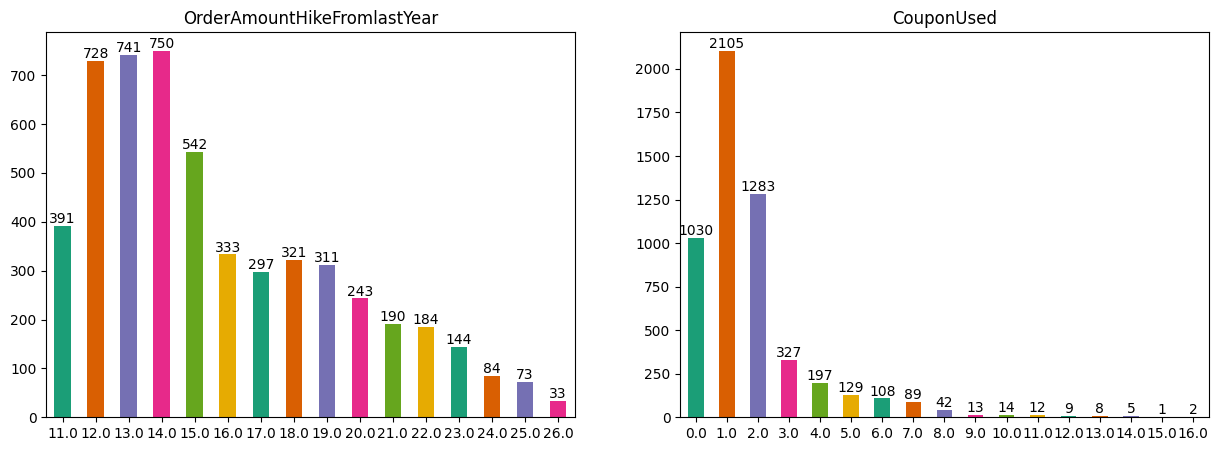

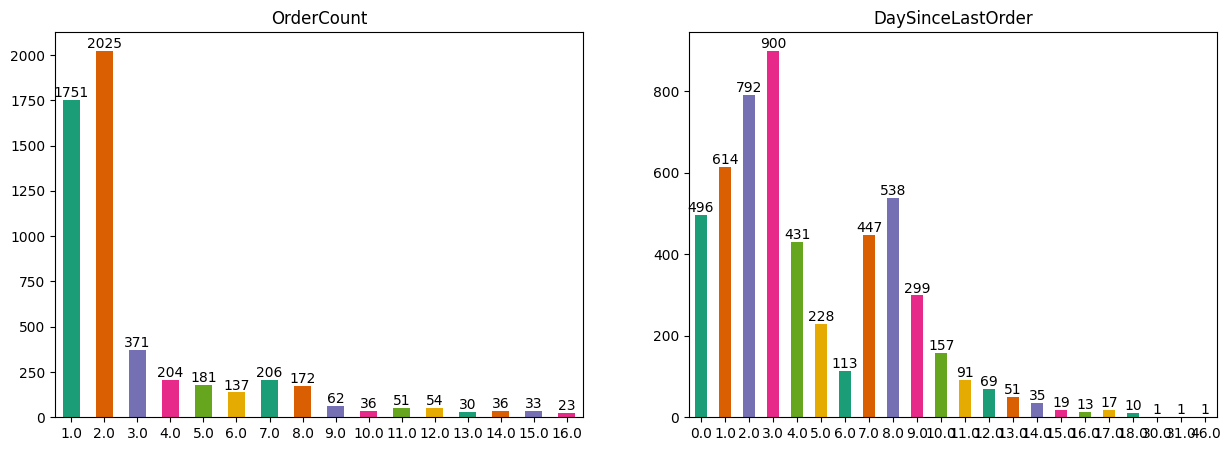

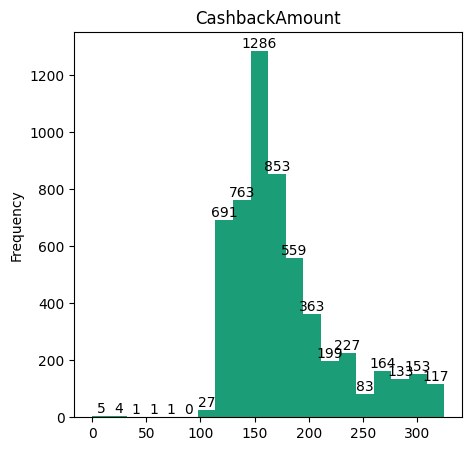

In [ ]:
# @title Plotting all data

# 1st Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('Churn').size().plot(kind='bar', rot='horizontal', title='Churn',
                                     color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df['Tenure'].plot(kind='hist', bins=20, title='Tenure',
                       color=sns.palettes.mpl_palette('Dark2'))
ax.bar_label(ax.containers[0]);




# 2nd Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('PreferredLoginDevice').size().plot(kind='bar', rot='horizontal',
                                                    title='Preferred Login Device',
                                                    color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('CityTier').size().plot(kind='bar', rot='horizontal', title='CityTier',
                                        color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 3rd Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df['WarehouseToHome'].plot(kind='hist', bins=20, title='WarehouseToHome',
                                color=sns.palettes.mpl_palette('Dark2'))
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('PreferredPaymentMode').size().plot(kind='bar', title='PreferredPaymentMode',
                                                    color=sns.palettes.mpl_palette('Dark2'))
ax.set_xticklabels(df['PreferredPaymentMode'].unique(), rotation=45, ha='right')
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 4th Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('Gender').size().plot(kind='bar', rot='horizontal', title='Gender',
                                      color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('HourSpendOnApp').size().plot(kind='bar', rot='horizontal', title='HourSpendOnApp',
                                              color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 5th Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('NumberOfDeviceRegistered').size().plot(kind='bar', rot='horizontal',
                                                        title='NumberOfDeviceRegistered',
                                                        color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('PreferedOrderCat').size().plot(kind='bar', rot='horizontal',
                                                title='PreferedOrderCat',
                                                color=sns.palettes.mpl_palette('Dark2'))
ax.set_xticklabels(df['PreferedOrderCat'].unique(), rotation=45, ha='right')
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 6th Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('SatisfactionScore').size().plot(kind='bar', rot='horizontal',
                                                        title='SatisfactionScore',
                                                        color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('MaritalStatus').size().plot(kind='bar', rot='horizontal',
                                                title='MaritalStatus',
                                                color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 7th Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('NumberOfAddress').size().plot(kind='bar', rot='horizontal',
                                                        title='NumberOfAddress',
                                                        color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('Complain').size().plot(kind='bar', rot='horizontal',
                                                title='Complain',
                                                color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 8th Figure
fig = plt.figure(figsize=(15, 5))

# 1st Column
plt.subplot(1, 2, 1)
ax = df.groupby('OrderAmountHikeFromlastYear').size().plot(kind='bar', rot='horizontal',
                                                           title='OrderAmountHikeFromlastYear',
                                                           color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 2nd Column
plt.subplot(1, 2, 2)
ax = df.groupby('CouponUsed').size().plot(kind='bar', rot='horizontal',
                                          title='CouponUsed',
                                          color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 9th Figure
fig = plt.figure(figsize=(15, 5))

# 2nd Column
plt.subplot(1, 2, 1)
ax = df.groupby('OrderCount').size().plot(kind='bar', rot='horizontal',
                                          title='OrderCount',
                                          color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);

# 3rd Column
plt.subplot(1, 2, 2)
ax = df.groupby('DaySinceLastOrder').size().plot(kind='bar', rot='horizontal',
                                                 title='DaySinceLastOrder',
                                                 color=sns.palettes.mpl_palette('Dark2'))
ax.set_xlabel('')
ax.bar_label(ax.containers[0]);




# 10th Figure
fig = plt.figure(figsize=(5, 5))

ax = df['CashbackAmount'].plot(kind='hist', bins=20, title='CashbackAmount',
                                color=sns.palettes.mpl_palette('Dark2'))
ax.bar_label(ax.containers[0]);

### Bivariate Analysis

In [ ]:
# @title Warning

import warnings

warnings.filterwarnings('ignore')

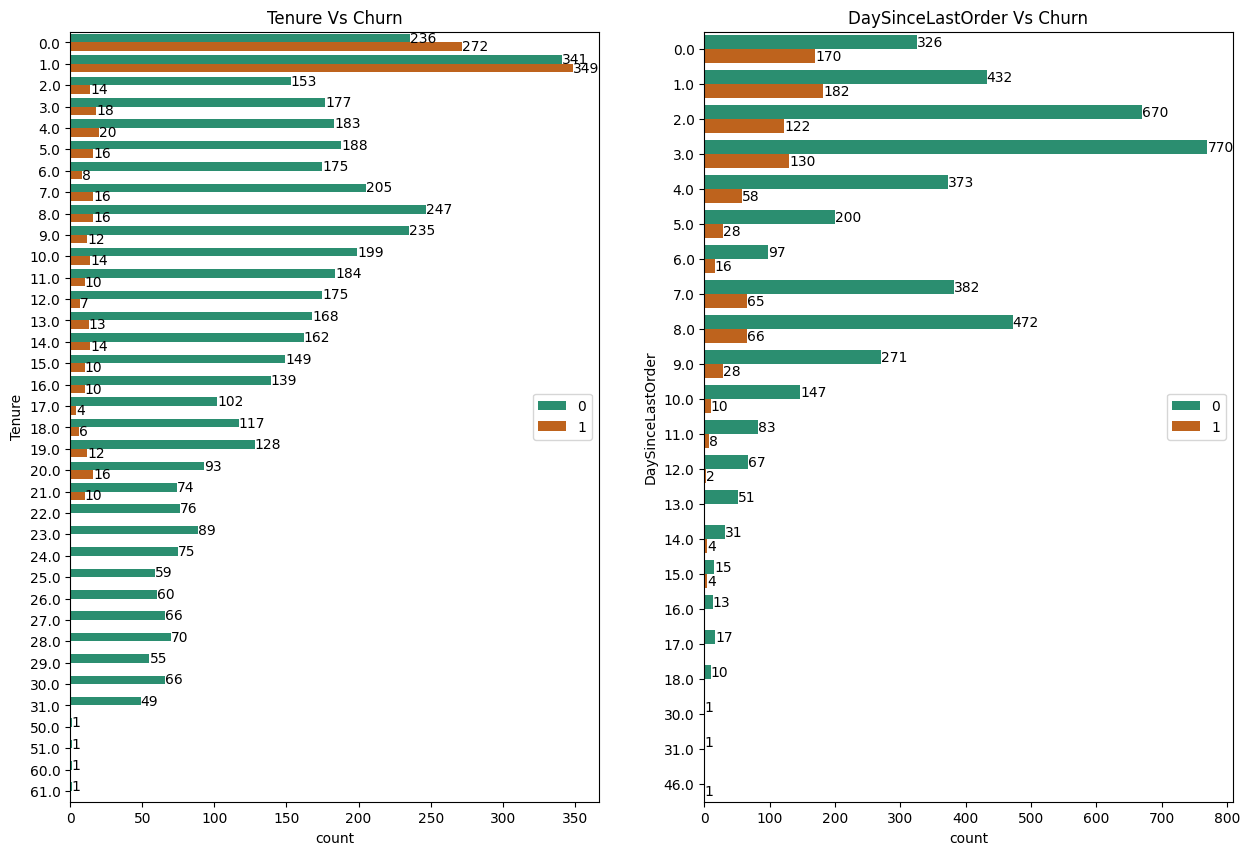

In [ ]:
# @title `Tenure` Vs `Churn` <br>and <br>`DaySinceLastOrder` Vs `Churn`
# @markdown **Data Insights:**
# @markdown > Plot 1 - If the 'tenure' is less, the 'Churn' is more. <br>
# @markdown > Plot 2 - If the `DaySinceLastOrder` is more is also somewhat related to `Churn`.

fig = plt.figure(figsize=(15, 10))

plt.subplot(121)
ax = sns.countplot(df, y='Tenure', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.legend(loc='center right')
ax.set_title('Tenure Vs Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(122)
ax = sns.countplot(df, y='DaySinceLastOrder', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.legend(loc='center right')
ax.set_title('DaySinceLastOrder Vs Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

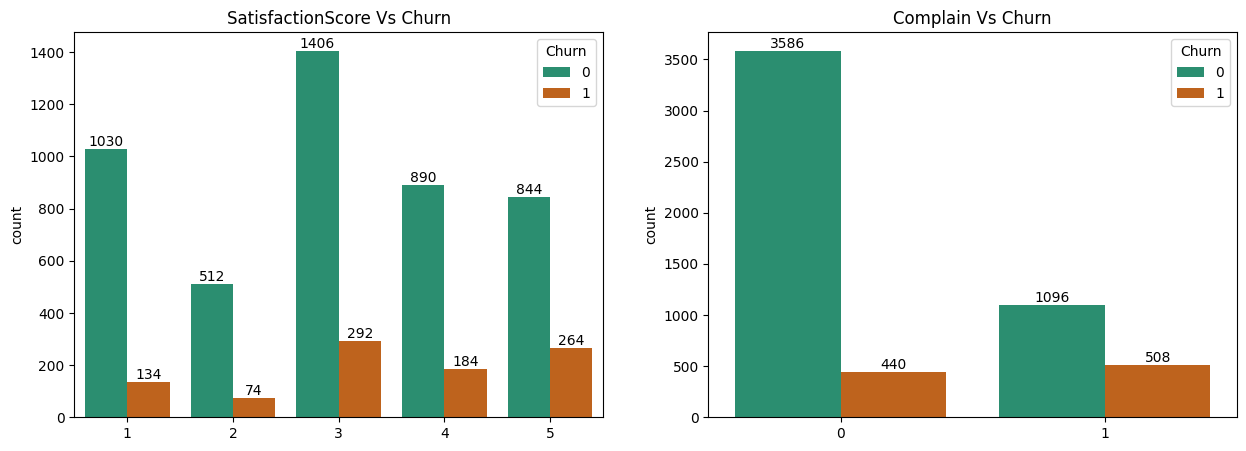

In [ ]:
# @title `PreferredLoginDevice` Vs `Churn` <br>and <br>`CityTier` Vs `Churn`
# @markdown **Data Insights:**
# @markdown > Plot 1 - Data shows 'Satisfaction Score' is not much related to 'Churn'. <br>
# @markdown > Plot 2 - If 'Complain' is more, then 'Churn' is also more.

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
ax = sns.countplot(df, x='SatisfactionScore', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.set_title('SatisfactionScore Vs Churn')
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(122)
ax = sns.countplot(df, x='Complain', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.set_title('Complain Vs Churn')
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

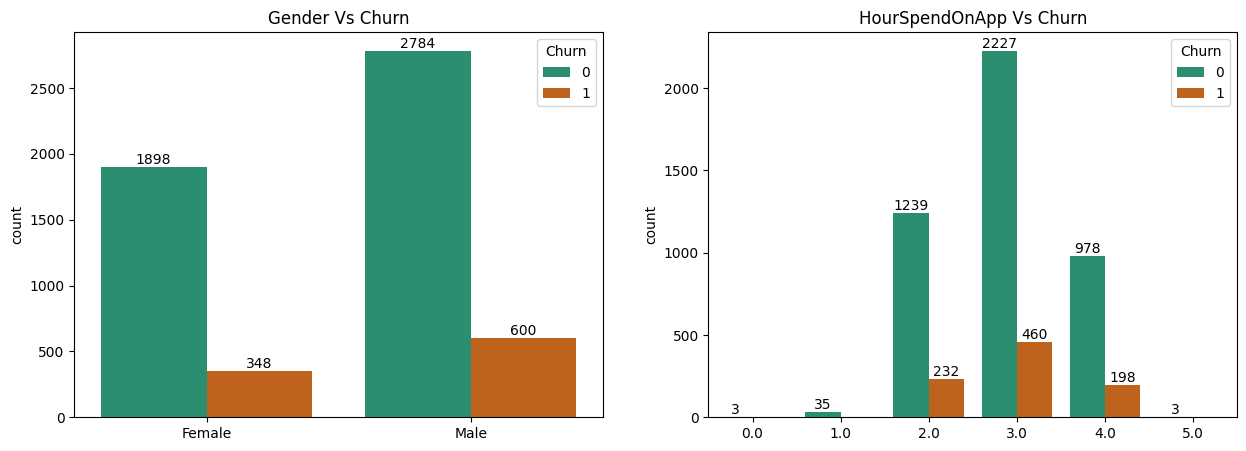

In [ ]:
# @title `PreferredLoginDevice` Vs `Churn` <br>and <br>`CityTier` Vs `Churn`
# @markdown **Data Insights:**
# @markdown > Plot 1 - Data shows positive relation to 'Churn'. <br>
# @markdown > Plot 2 - Data shows positive relation to 'Churn'.

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
ax = sns.countplot(df, x='Gender', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.set_title('Gender Vs Churn')
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(122)
ax = sns.countplot(df, x='HourSpendOnApp', hue='Churn', palette=sns.palettes.mpl_palette('Dark2'))
ax.set_title('HourSpendOnApp Vs Churn')
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

### Multivariate Analysis

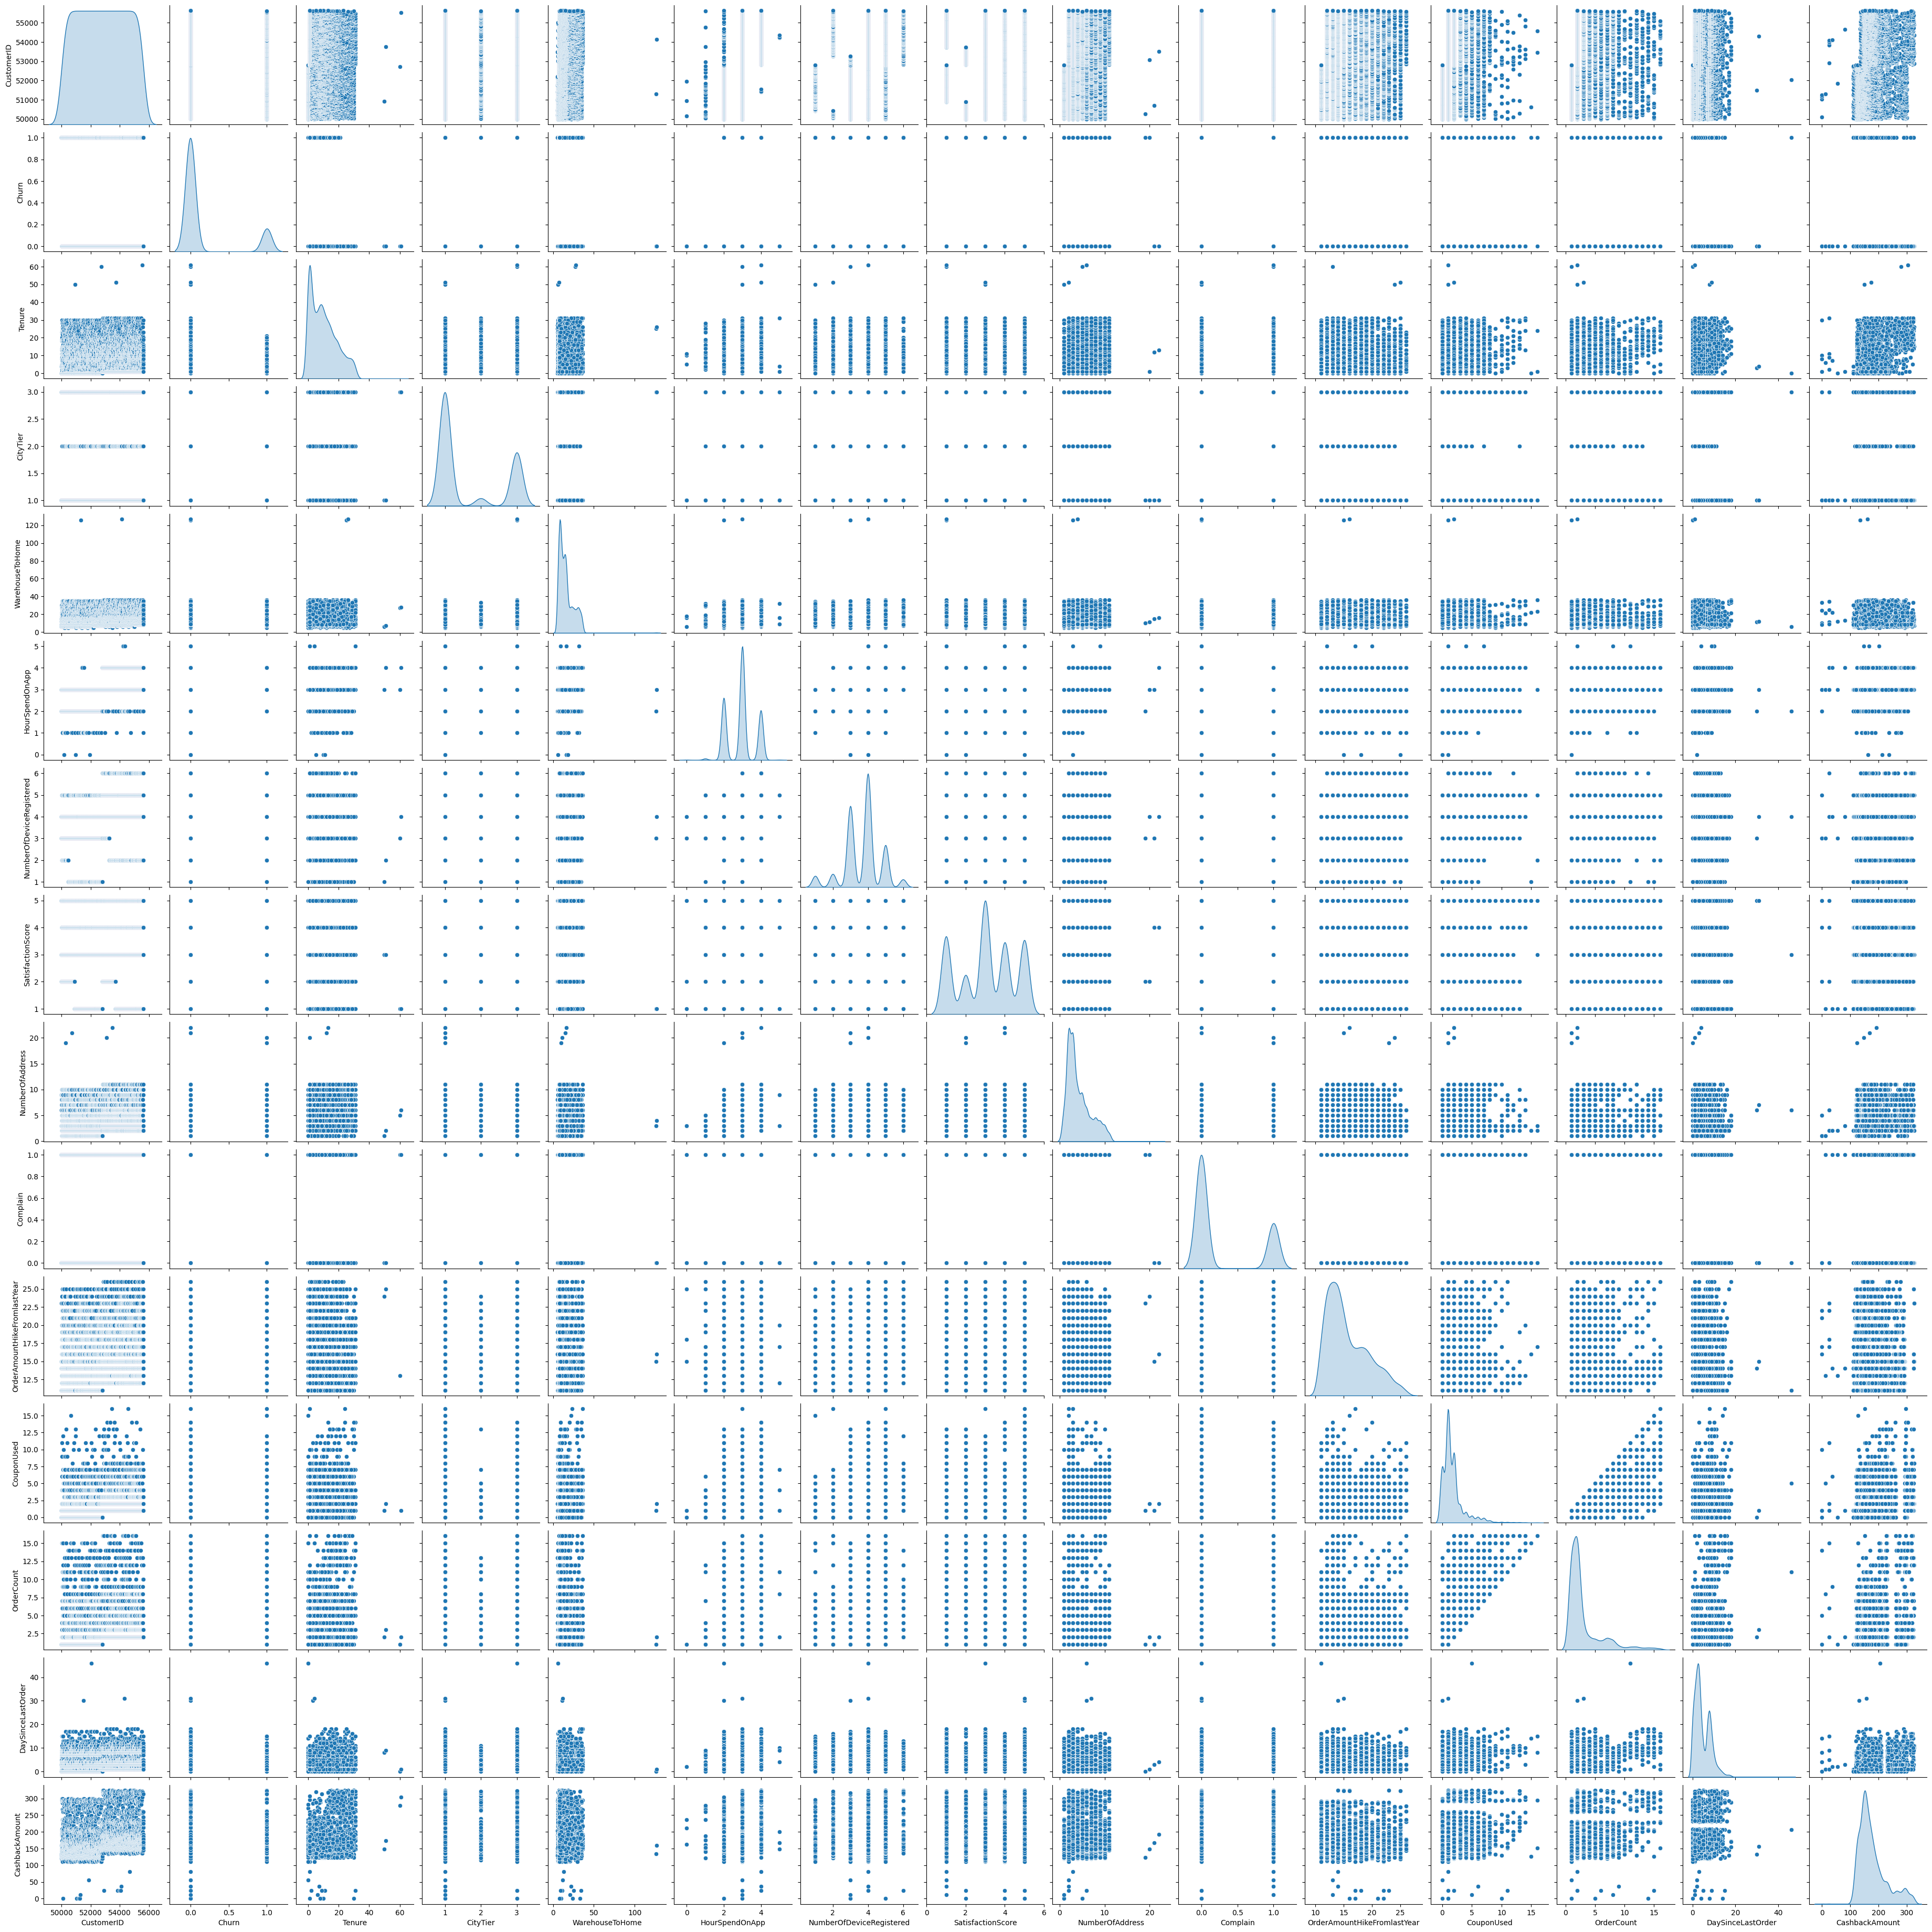

In [ ]:
# @title Pairplot

sns.pairplot(df, diag_kind='kde');

## Splitting the data

In [ ]:
len(df) * 0.15

844.5

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(['CustomerID', 'Churn'], axis=1), df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=8)

len(X_train), len(y_train), len(X_val), len(y_val)

(4785, 4785, 845, 845)

## Missing Data Analysis

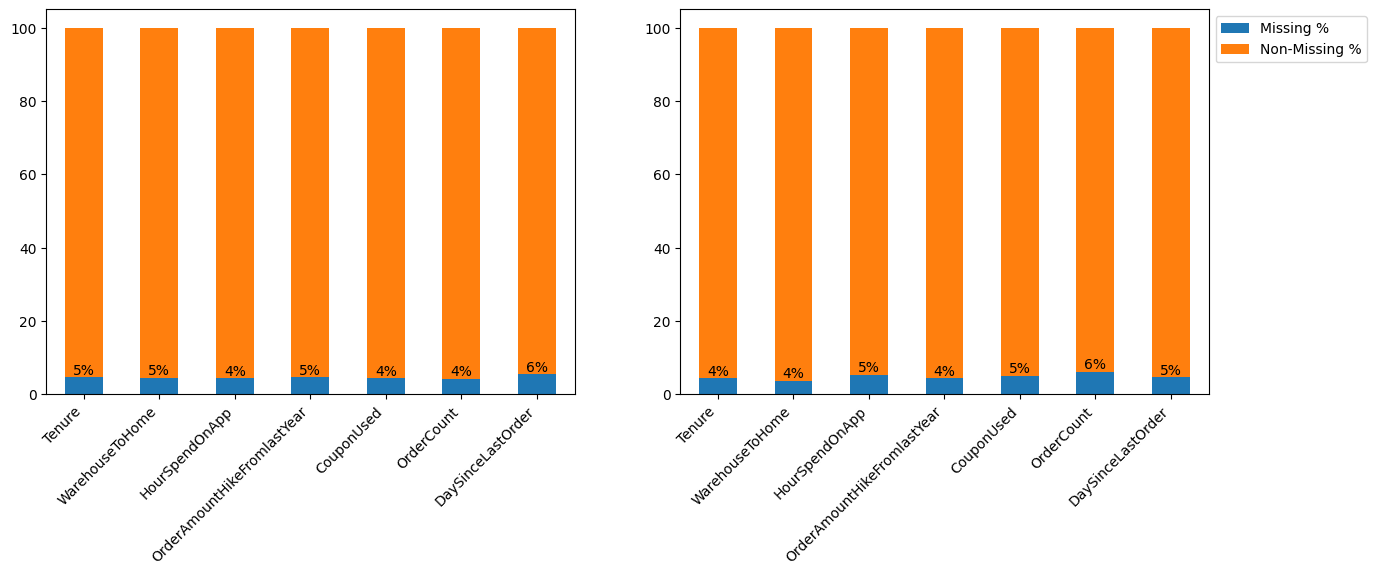

In [ ]:
# @title Analyse

train_missing_per = (X_train.isnull().sum()[X_train.isnull().sum() > 0] / len(X_train)) * 100
val_missing_per = (X_val.isnull().sum()[X_val.isnull().sum() > 0] / len(X_val)) * 100

train_miss_df = pd.DataFrame({
    'Col Name': train_missing_per.index,
    'Missing %': train_missing_per,
    'Non-Missing %': 100 - train_missing_per,
})

val_miss_df = pd.DataFrame({
    'Col Name': val_missing_per.index,
    'Missing %': val_missing_per,
    'Non-Missing %': 100 - val_missing_per,
})



fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_miss_df.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_xticklabels(train_miss_df['Col Name'].values, rotation=45, ha='right')
ax[0].get_legend().remove()
ax[0].bar_label(ax[0].containers[0], fmt='%.0f%%');


val_miss_df.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_xticklabels(val_miss_df['Col Name'].values, rotation=45, ha='right')
ax[1].legend(bbox_to_anchor=(1,1))
ax[1].bar_label(ax[1].containers[0], fmt='%.0f%%');

In [ ]:
missing_cols = train_missing_per.index

X_train[missing_cols].dtypes

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
dtype: object

**About Data:**

> All missing data are numeric types so we can use `IterativeImputer` to solve the missing data.

### Imputing Missing values using `IterativeImputer`

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute  import IterativeImputer

impute = IterativeImputer(random_state=8)
impute.fit(X_train[missing_cols])
train_miss_data = impute.transform(X_train[missing_cols])
val_miss_data = impute.transform(X_val[missing_cols])

In [ ]:
X_train_missing = pd.DataFrame(train_miss_data, columns=missing_cols, index=X_train.index)
X_val_missing = pd.DataFrame(val_miss_data, columns=missing_cols, index=X_val.index)

In [ ]:
X_train_missing.head()

Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
3742     4.0             14.0             4.0                         14.0   
3970    11.0             15.0             3.0                         14.0   
4878    19.0             30.0             3.0                         16.0   
1805     0.0             35.0             2.0                         12.0   
596     23.0             30.0             3.0                         18.0   

      CouponUsed  OrderCount  DaySinceLastOrder  
3742         1.0    2.000000                1.0  
3970         5.0    5.000000                8.0  
4878         2.0    2.000000                9.0  
1805         0.0    1.000000                0.0  
596          0.0    1.551721                5.0

In [ ]:
# Removing original columns from `X_train` and `X_val`.
X_train.drop(missing_cols, axis=1, inplace=True)
X_val.drop(missing_cols, axis=1, inplace=True)

In [ ]:
X_train = pd.concat([X_train, X_train_missing], axis=1)
X_val = pd.concat([X_val, X_val_missing], axis=1)

In [ ]:
X_train.isnull().sum().sum(), X_val.isnull().sum().sum()

(0, 0)

## Label Encoder

In [ ]:
obj_cols = X_train.select_dtypes('object').columns
obj_cols

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in X_train.columns:
    if col in obj_cols:
        encoder = LabelEncoder()
        encoder.fit(X_train[col])
        X_train[col] = encoder.transform(X_train[col])
        X_val[col] = encoder.transform(X_val[col])

In [ ]:
X_train.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
X_train.head()

PreferredLoginDevice  CityTier  PreferredPaymentMode  Gender  \
3742                     0         1                     1       1   
3970                     1         2                     6       1   
4878                     0         1                     4       1   
1805                     2         3                     3       1   
596                      1         1                     4       1   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
3742                         4                 4                  3   
3970                         4                 2                  4   
4878                         4                 2                  5   
1805                         3                 2                  3   
596                          3                 1                  3   

      MaritalStatus  NumberOfAddress  Complain  CashbackAmount  Tenure  \
3742              1                3         0             138     4.0   
3970              1                4         0             166    11.0   
4878              1                3         1             161    19.0   
1805              1                6         0             143     0.0   
596               0                4         1             240    23.0   

      WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
3742             14.0             4.0                         14.0   
3970             15.0             3.0                         14.0   
4878             30.0             3.0                         16.0   
1805             35.0             2.0                         12.0   
596              30.0             3.0                         18.0   

      CouponUsed  OrderCount  DaySinceLastOrder  
3742         1.0    2.000000                1.0  
3970         5.0    5.000000                8.0  
4878         2.0    2.000000                9.0  
1805         0.0    1.000000                0.0  
596          0.0    1.551721                5.0

## Checking for Outliers

In [ ]:
row = pd.concat([X_train, X_val])
col = pd.concat([y_train, y_val])

data = pd.concat([row, col], axis=1)

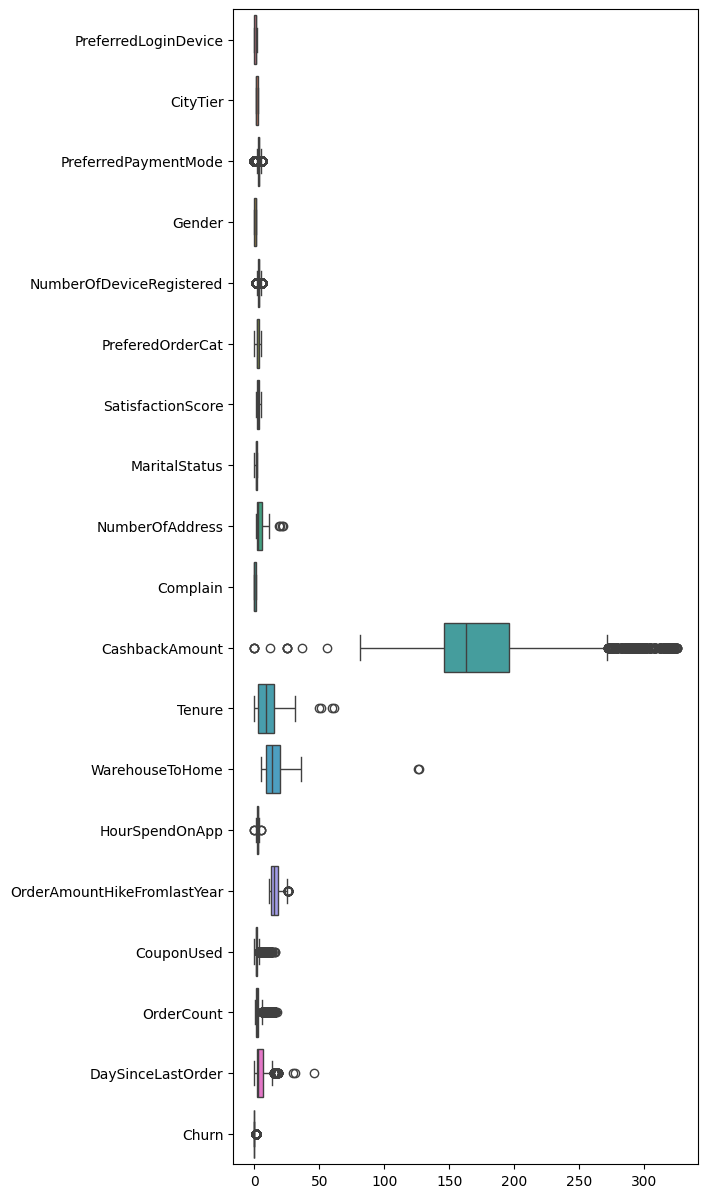

In [ ]:
fig = plt.figure(figsize=(6, 15))
sns.boxplot(data, orient='h');

## Correlation matrix

In [ ]:
corr = data.corr()
lar_cols = corr.nlargest(8, 'Churn')['Churn']
sma_cols = corr.nsmallest(5, 'Churn')['Churn']
lar_cols, sma_cols

(Churn                       1.000000
 Complain                    0.250188
 MaritalStatus               0.140316
 PreferedOrderCat            0.118922
 NumberOfDeviceRegistered    0.107939
 SatisfactionScore           0.105481
 CityTier                    0.084703
 WarehouseToHome             0.073382
 Name: Churn, dtype: float64,
 Tenure                 -0.339190
 CashbackAmount         -0.154161
 DaySinceLastOrder      -0.149602
 OrderCount             -0.029603
 PreferredPaymentMode   -0.026519
 Name: Churn, dtype: float64)

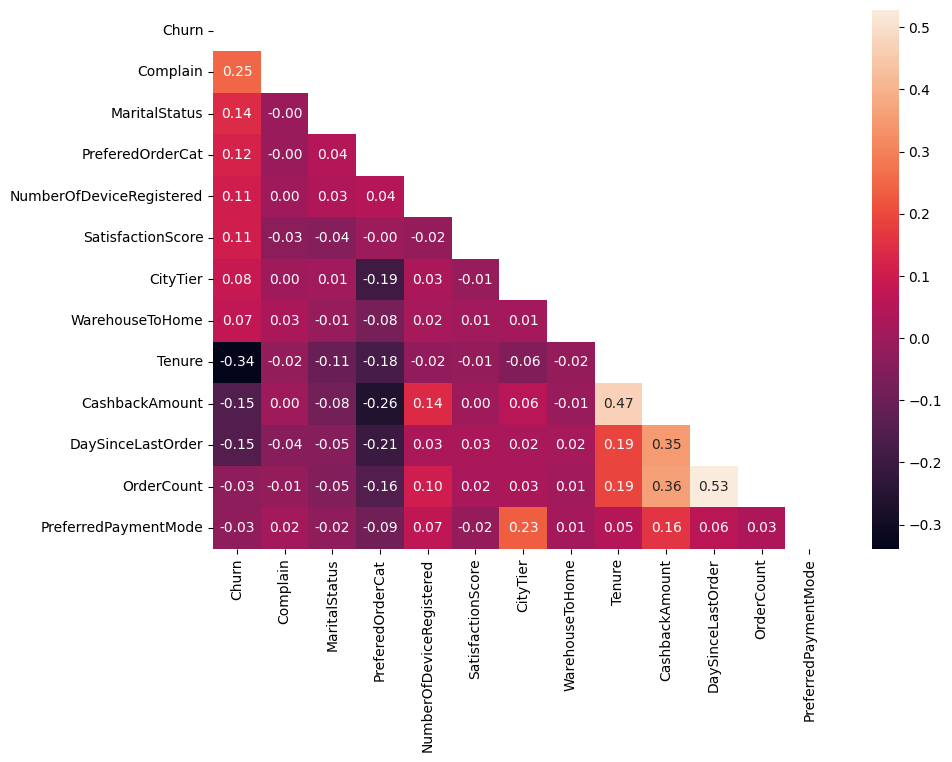

In [ ]:
# @title Selecting only highest correlated features

cols = list(lar_cols.index) + list(sma_cols.index)

corr = data[cols].corr()
mask = np.triu(corr)
fig = plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f');

## Getting the train and validation data of important features

In [ ]:
cols.remove('Churn')

In [ ]:
X_train = X_train[cols]
X_val = X_val[cols]

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
scaling.fit(X_train)
X_train = pd.DataFrame(scaling.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(scaling.transform(X_val), columns=X_val.columns, index=X_val.index)

In [ ]:
X_train.head()

Complain  MaritalStatus  PreferedOrderCat  NumberOfDeviceRegistered  \
3742 -0.635649      -0.253492          1.150382                  0.301810   
3970 -0.635649      -0.253492         -0.269421                  0.301810   
4878  1.573196      -0.253492         -0.269421                  0.301810   
1805 -0.635649      -0.253492         -0.269421                 -0.675956   
596   1.573196      -1.760272         -0.979323                 -0.675956   

      SatisfactionScore  CityTier  WarehouseToHome    Tenure  CashbackAmount  \
3742          -0.057147 -0.716341        -0.191912 -0.724444       -0.788577   
3970           0.668178  0.375281        -0.072108  0.111288       -0.218016   
4878           1.393503 -0.716341         1.724950  1.066411       -0.319902   
1805          -0.057147  1.466903         2.323969 -1.202005       -0.686691   
596           -0.057147 -0.716341         1.724950  1.543973        1.289893   

      DaySinceLastOrder  OrderCount  PreferredPaymentMode  
3742          -0.990776   -0.358543             -1.841751  
3970           0.952060    0.655198              1.761184  
4878           1.229608   -0.358543              0.320010  
1805          -1.268324   -0.696457             -0.400577  
596            0.119416   -0.510023              0.320010

## Data balancing using `SMOTE`

> Since, the data is imbalanced we need to try to balance the `Churn`.

In [ ]:
from imblearn.combine import SMOTEENN

print(f'Train Before: {y_train.value_counts()}')
print(f'Validation Before: {y_val.value_counts()}')
sm = SMOTEENN(random_state=8)
sm.fit(X_train, y_train)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_val_sm, y_val_sm = sm.fit_resample(X_val, y_val)
print(f'Train After: {y_train_sm.value_counts()}')
print(f'Validation After: {y_val_sm.value_counts()}')

Train Before: 0    3962
1     823
Name: Churn, dtype: int64
Validation Before: 0    720
1    125
Name: Churn, dtype: int64
Train After: 1    3894
0    3371
Name: Churn, dtype: int64
Validation After: 1    696
0    506
Name: Churn, dtype: int64


In [ ]:
X_train_sm.head()

Complain  MaritalStatus  PreferedOrderCat  NumberOfDeviceRegistered  \
0 -0.635649      -0.253492         -0.269421                  0.301810   
1  1.573196      -0.253492         -0.269421                  0.301810   
2 -0.635649      -0.253492         -0.269421                 -0.675956   
3  1.573196      -1.760272         -0.979323                 -0.675956   
4 -0.635649      -0.253492          1.150382                  0.301810   

   SatisfactionScore  CityTier  WarehouseToHome    Tenure  CashbackAmount  \
0           0.668178  0.375281        -0.072108  0.111288       -0.218016   
1           1.393503 -0.716341         1.724950  1.066411       -0.319902   
2          -0.057147  1.466903         2.323969 -1.202005       -0.686691   
3          -0.057147 -0.716341         1.724950  1.543973        1.289893   
4           0.668178 -0.716341         0.167500 -0.843834       -0.381034   

   DaySinceLastOrder  OrderCount  PreferredPaymentMode  
0           0.952060    0.655198              1.761184  
1           1.229608   -0.358543              0.320010  
2          -1.268324   -0.696457             -0.400577  
3           0.119416   -0.510023              0.320010  
4          -0.713228   -0.358543              0.320010

## Clustering

In [ ]:
from sklearn.cluster import KMeans

interia = []

for i in range(1, 20):
    k_means = KMeans(n_clusters=i, n_init='auto')
    k_means.fit(X_train_sm)
    inter = k_means.inertia_
    interia.append(inter)

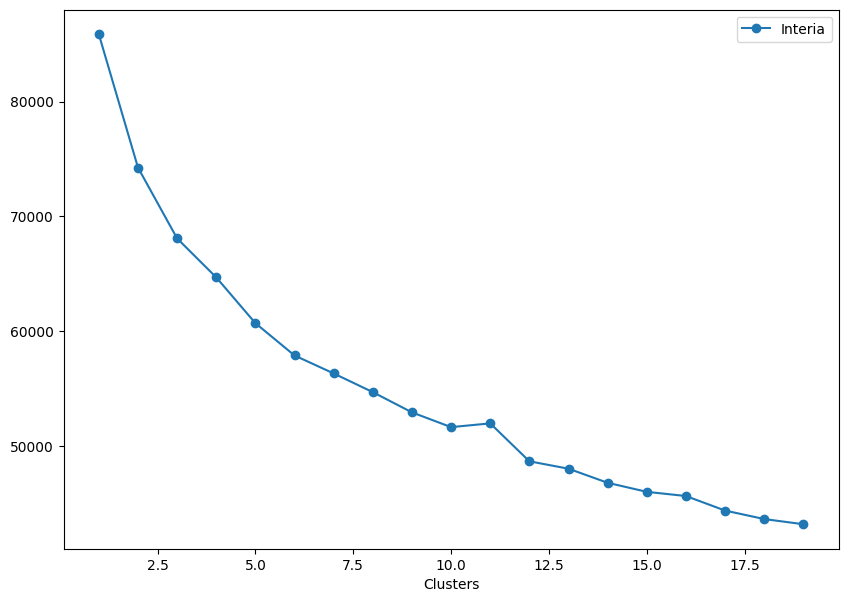

In [ ]:
cluster = pd.DataFrame({
    'Clusters': list(range(1, 20)),
    'Interia': interia

})

cluster.plot(x='Clusters', y='Interia', marker='o', figsize=(10, 7));

In [ ]:
k_means = KMeans(n_clusters=7, random_state=8, n_init='auto')
k_means.fit(X_train_sm)
train_labels = k_means.predict(X_train_sm)
train_labels

array([0, 1, 0, ..., 0, 4, 5], dtype=int32)

In [ ]:
val_labels = k_means.predict(X_val_sm)
val_labels[:10]

array([1, 4, 1, 2, 1, 5, 1, 1, 1, 1], dtype=int32)

In [ ]:
X_train_means = X_train_sm.copy()
X_train_means['Clusters'] = train_labels

X_val_means = X_val_sm.copy()
X_val_means['Clusters'] = val_labels

In [ ]:
X_train_means.head()

Complain  MaritalStatus  PreferedOrderCat  NumberOfDeviceRegistered  \
0 -0.635649      -0.253492         -0.269421                  0.301810   
1  1.573196      -0.253492         -0.269421                  0.301810   
2 -0.635649      -0.253492         -0.269421                 -0.675956   
3  1.573196      -1.760272         -0.979323                 -0.675956   
4 -0.635649      -0.253492          1.150382                  0.301810   

   SatisfactionScore  CityTier  WarehouseToHome    Tenure  CashbackAmount  \
0           0.668178  0.375281        -0.072108  0.111288       -0.218016   
1           1.393503 -0.716341         1.724950  1.066411       -0.319902   
2          -0.057147  1.466903         2.323969 -1.202005       -0.686691   
3          -0.057147 -0.716341         1.724950  1.543973        1.289893   
4           0.668178 -0.716341         0.167500 -0.843834       -0.381034   

   DaySinceLastOrder  OrderCount  PreferredPaymentMode  Clusters  
0           0.952060    0.655198              1.761184         0  
1           1.229608   -0.358543              0.320010         1  
2          -1.268324   -0.696457             -0.400577         0  
3           0.119416   -0.510023              0.320010         1  
4          -0.713228   -0.358543              0.320010         4

In [ ]:
X_train_final = X_train_means.copy()
X_val_final = X_val_means.copy()

y_train_final = y_train_sm.copy()
y_val_final = y_val_sm.copy()

In [ ]:
X_train_final['Clusters'].value_counts()

4    1378
0    1156
5    1093
1    1026
6     893
3     882
2     837
Name: Clusters, dtype: int64

In [ ]:
X_val_final['Clusters'].value_counts()

4    248
0    217
5    173
1    168
3    148
2    124
6    124
Name: Clusters, dtype: int64

## Creating the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (GradientBoostingClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier,
                              BaggingClassifier,
                              StackingClassifier)
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=8),
    'DecisionTree': DecisionTreeClassifier(random_state=8),
    'SVC': SVC(random_state=8),
    'GradientBoosting': GradientBoostingClassifier(random_state=8),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=8),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'RandomForest': RandomForestClassifier(random_state=8),
    'AdaBoost': AdaBoostClassifier(random_state=8),
    'Bagging': BaggingClassifier(random_state=8),
    'XGB': XGBClassifier(),
}

In [ ]:
train_results = []
val_results = []

for name, model in models.items():
    result = cross_val_score(model, X=X_train_final, y=y_train_final, scoring='f1', cv=StratifiedKFold())
    train_results.append(np.mean(result))

    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_val_final)

    val_results.append(calculate_results(name, y_val_final, y_pred))

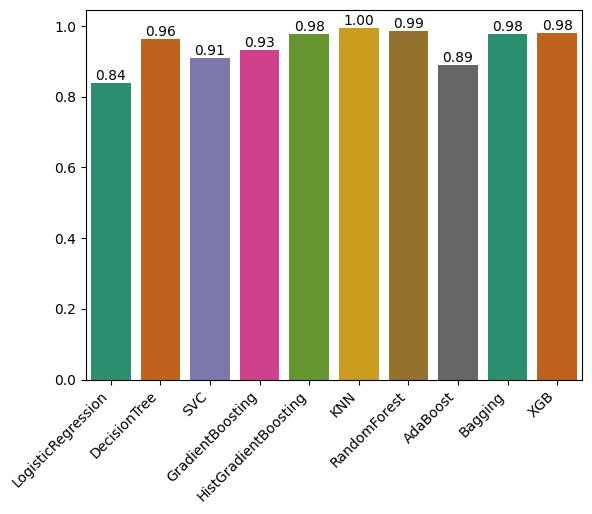

In [ ]:
# @title Train data score

ax = sns.barplot(x=list(models.keys()), y=train_results, palette='Dark2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
ax.set_xticklabels(list(models.keys()), rotation=45, ha='right');

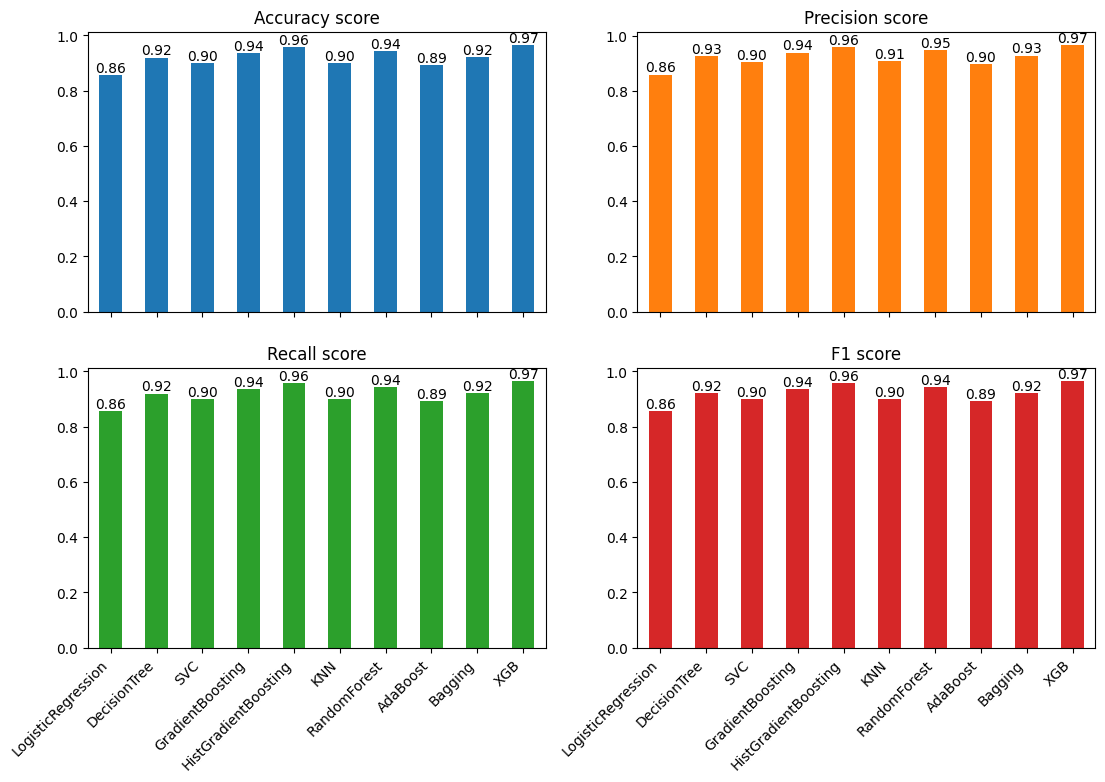

In [ ]:
# @title Validation data score

axis = pd.DataFrame(val_results).plot(kind='bar', subplots=True, figsize=(13, 8), layout=(2, 2))
for ax in axis.flatten():
    ax.get_legend().remove()
    ax.set_xticklabels(list(models.keys()), rotation=45, ha='right')
    ax.bar_label(ax.containers[0], fmt='%.2f');

**About Data:**
> <u>Best Models:</u>
* $DecisionTree$
* $GradientBoosting$
* $HistGradientBoosting$
* $KNN$
* $RandomForest$
* $Bagging$
* $XGB$

In [ ]:
best_models = ['DecisionTree', 'GradientBoosting', 'HistGradientBoosting', 'KNN', 'RandomForest', 'Bagging', 'XGB']
best_models_tuned = ['DecisionTreeTuned', 'GradientBoostingTuned', 'HistGradientBoostingTuned', 'KNNTuned', 'RandomForestTuned', 'XGBTuned']

In [ ]:
train_results, val_results  = [], []

In [ ]:
def pre_result_calculator(name, model):
    train_pred = model.predict(X_train_final)
    val_pred = model.predict(X_val_final)

    train_score = calculate_results(name, y_train_final, train_pred)
    val_score = calculate_results(name, y_val_final, val_pred)

    train_results.append(train_score)
    val_results.append(val_score)

    return (y_train_final, train_pred), \
     (y_val_final, val_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(val_score, index=[0])

In [ ]:
def plot(train, val):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    fig.set_tight_layout({'pad': 5.0,
                          'w_pad': 5.0,
                          'h_pad': 5.0})
    ax = ax.flatten()

    ConfusionMatrixDisplay.from_predictions(train[0], train[1], cmap=plt.cm.Blues, ax=ax[0])
    ax[0].set_title('Train Confusion Matrix')
    RocCurveDisplay.from_predictions(train[0], train[1], ax=ax[1])
    ax[1].set_title('Train Roc Curve')

    ConfusionMatrixDisplay.from_predictions(val[0], val[1], cmap=plt.cm.Blues, ax=ax[2])
    ax[2].set_title('Validation Confusion Matrix')
    RocCurveDisplay.from_predictions(val[0], val[1], ax=ax[3])
    ax[3].set_title('Validation Roc Curve')

### Model 0 - DecisionTree

     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  DecisionTree             1.0              1.0           1.0       1.0
     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  DecisionTree        0.920133         0.925599      0.920133  0.920569


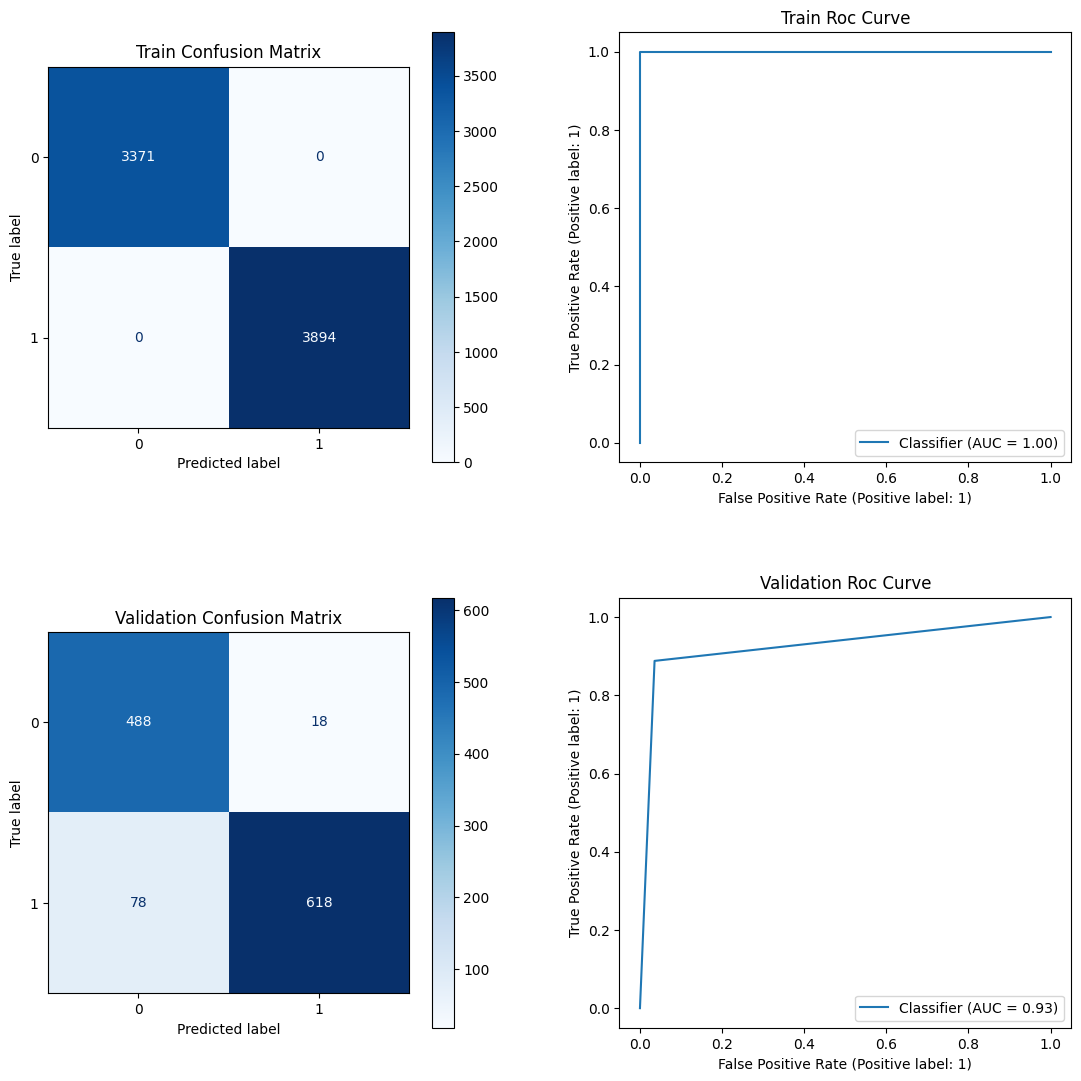

In [ ]:
dt = DecisionTreeClassifier(random_state=8)
dt.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[0], dt)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 1 - GradientBoosting

         Model Name  Accuracy score  Precision score  Recall score  F1 score
0  GradientBoosting        0.941225         0.941246      0.941225  0.941232
         Model Name  Accuracy score  Precision score  Recall score  F1 score
0  GradientBoosting        0.936772         0.938378      0.936772  0.936986


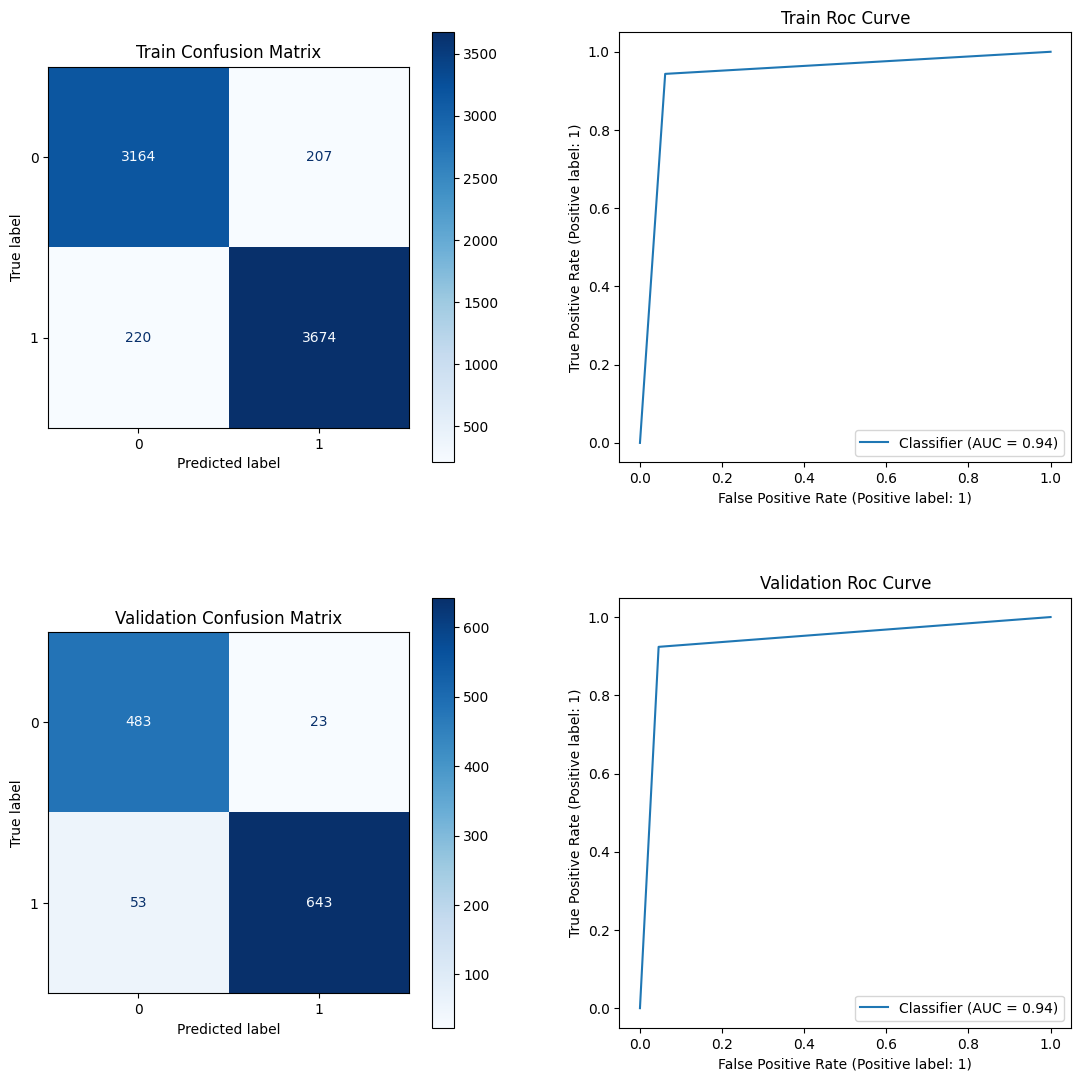

In [ ]:
gb = GradientBoostingClassifier(random_state=8)
gb.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[1], gb)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 2 - HistGradientBoosting

             Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoosting        0.997522         0.997522      0.997522   

   F1 score  
0  0.997522  
             Model Name  Accuracy score  Precision score  Recall score  \
0  HistGradientBoosting        0.956739         0.957905      0.956739   

   F1 score  
0  0.956869  


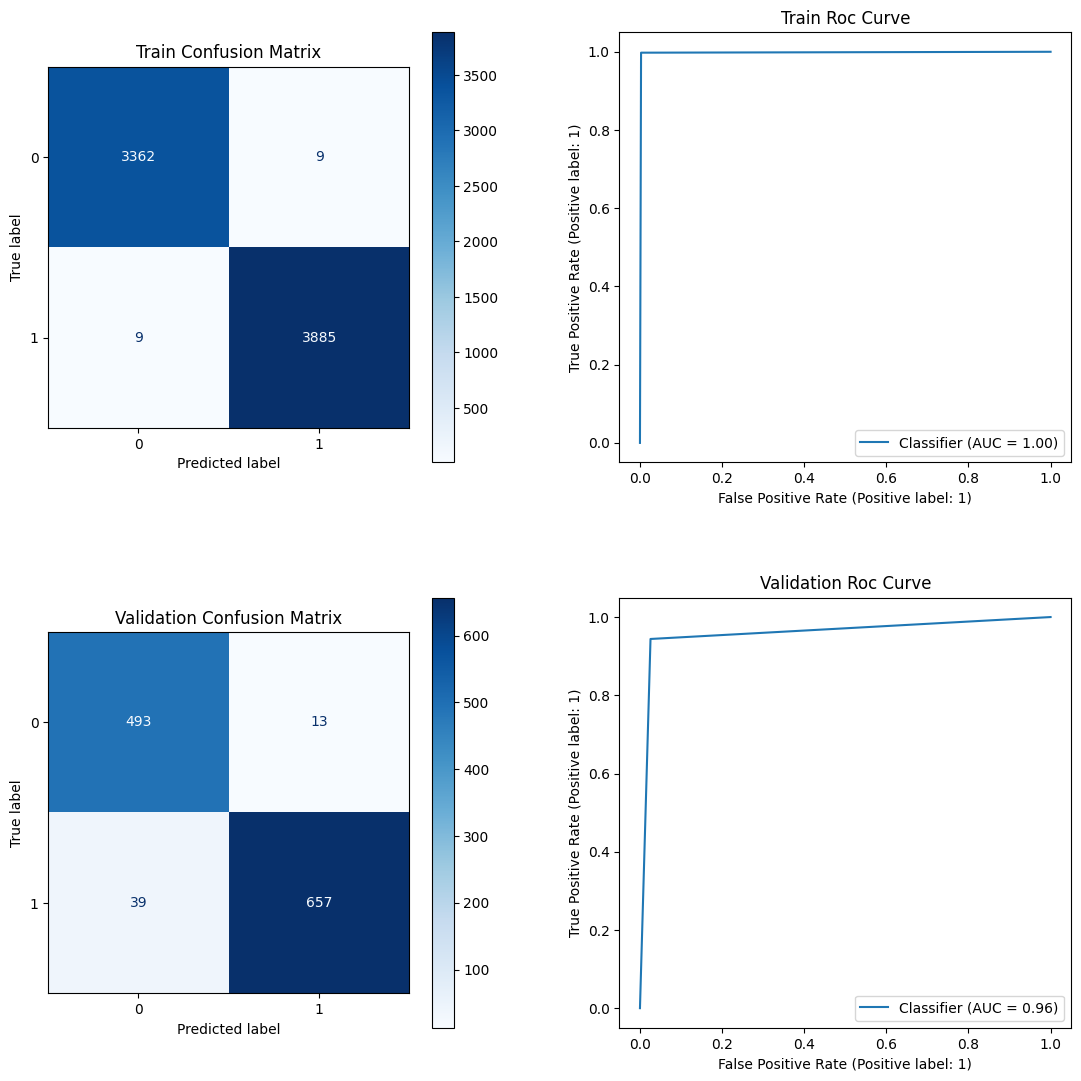

In [ ]:
hgb = HistGradientBoostingClassifier(random_state=8)
hgb.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[2], hgb)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 3 - KNN

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        KNN             1.0              1.0           1.0       1.0
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        KNN        0.899334         0.907548      0.899334  0.899941


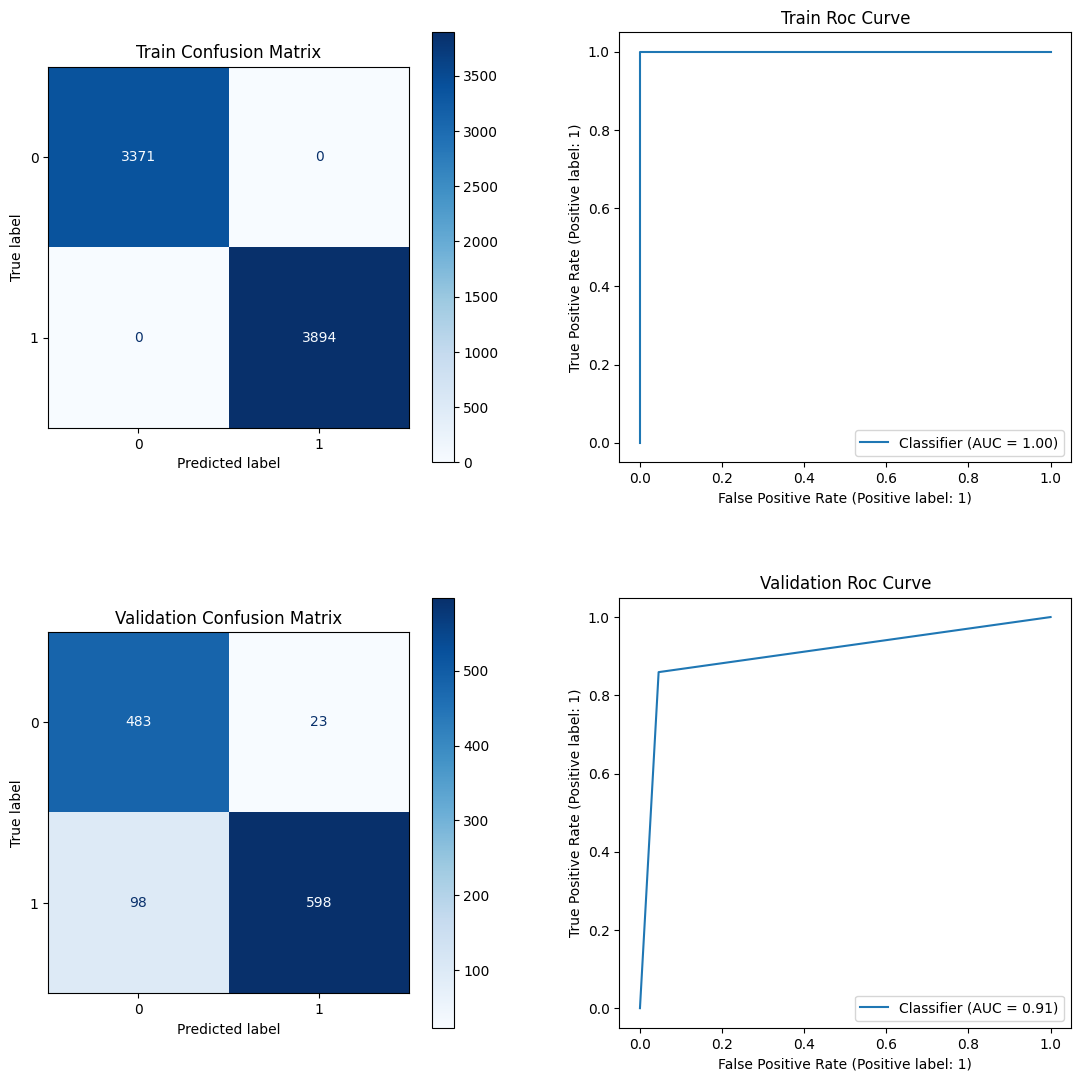

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[3], knn)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 4 - RandomForest

     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  RandomForest             1.0              1.0           1.0       1.0
     Model Name  Accuracy score  Precision score  Recall score  F1 score
0  RandomForest        0.942596         0.946859      0.942596  0.942888


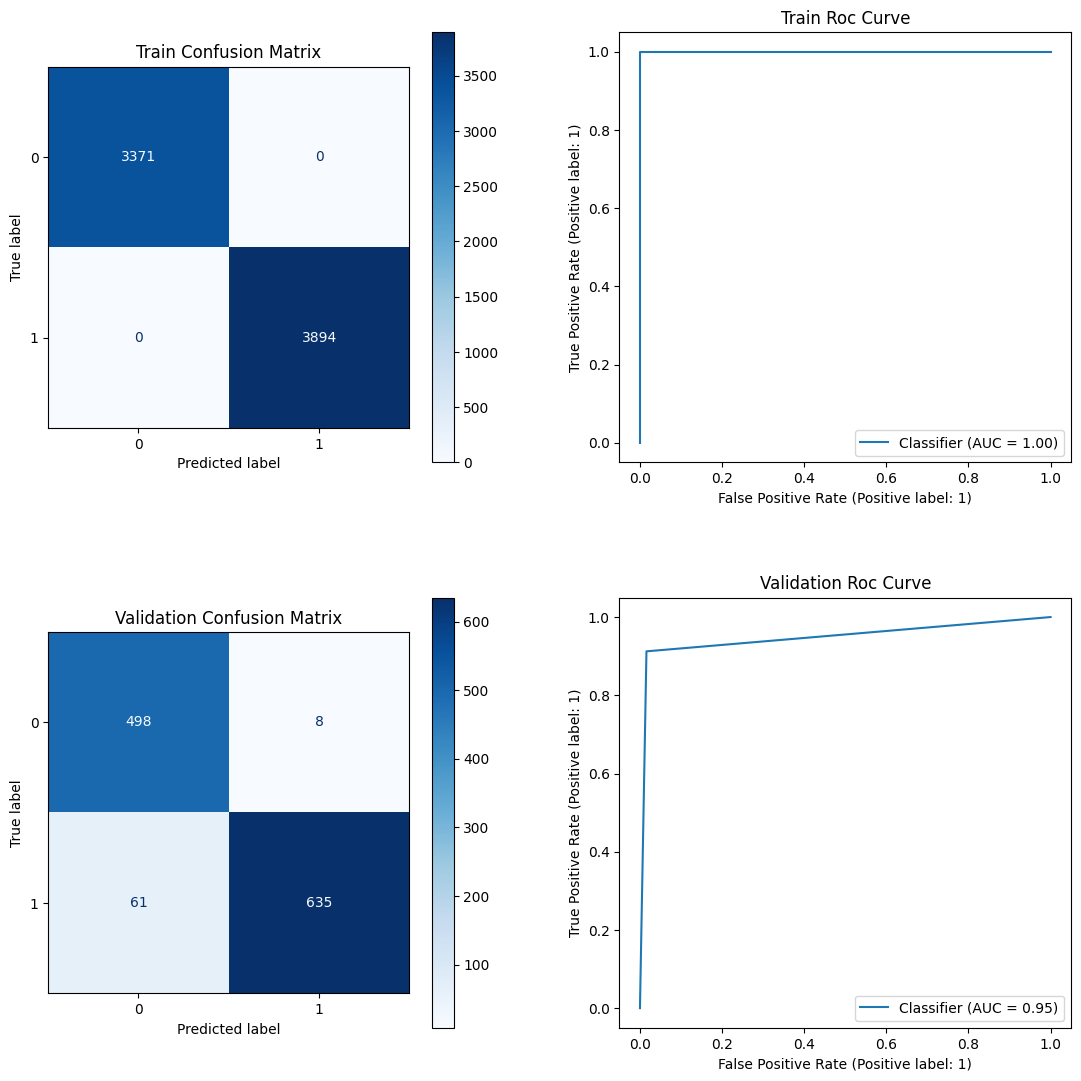

In [ ]:
rf = RandomForestClassifier(random_state=8)
rf.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[4], rf)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 5 - Bagging

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0    Bagging        0.999174         0.999174      0.999174  0.999174
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0    Bagging        0.920965         0.927961      0.920965  0.921426


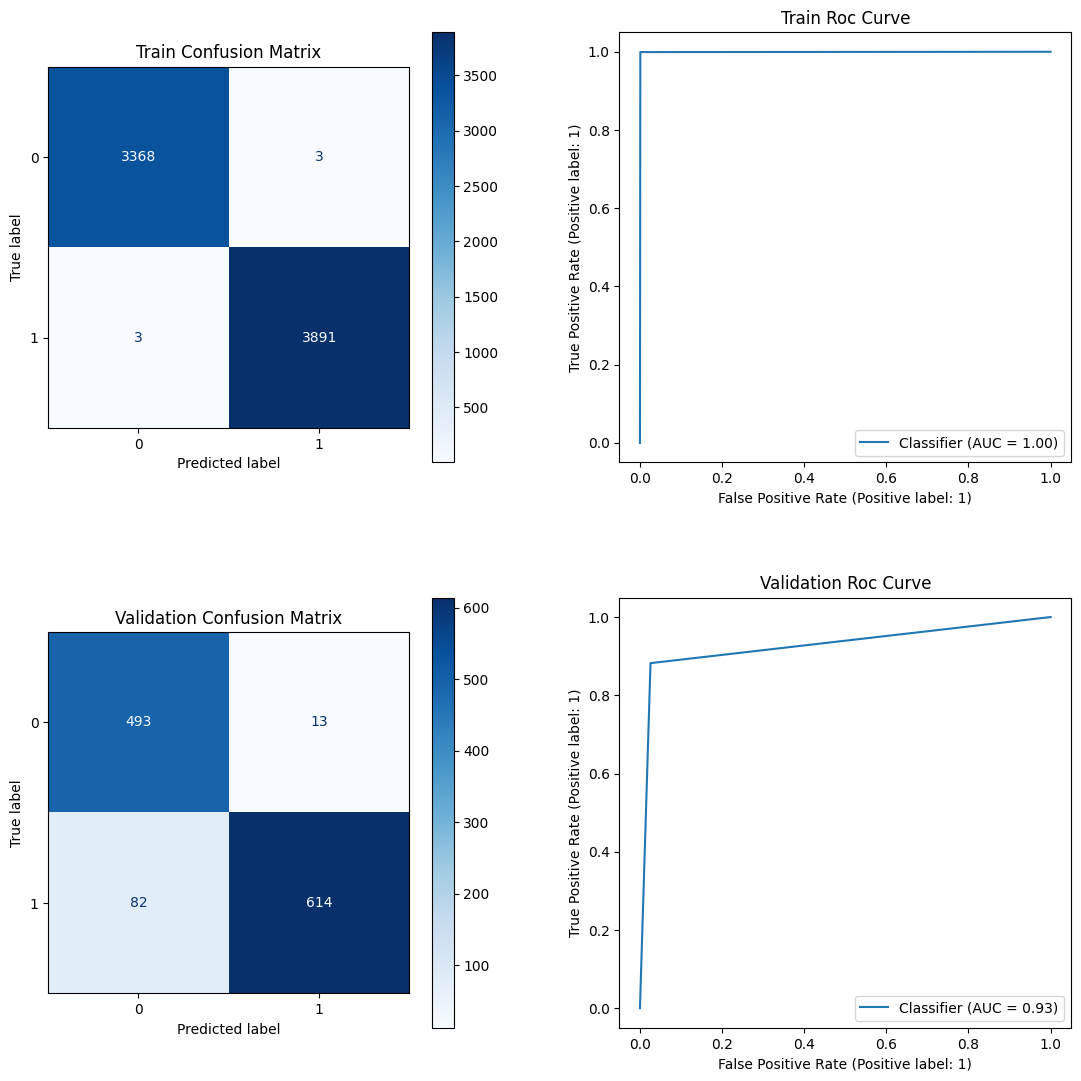

In [ ]:
bg = BaggingClassifier(random_state=8)
bg.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[5], bg)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Model 6 - XGB

  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        XGB             1.0              1.0           1.0       1.0
  Model Name  Accuracy score  Precision score  Recall score  F1 score
0        XGB         0.96589         0.966659       0.96589  0.965976


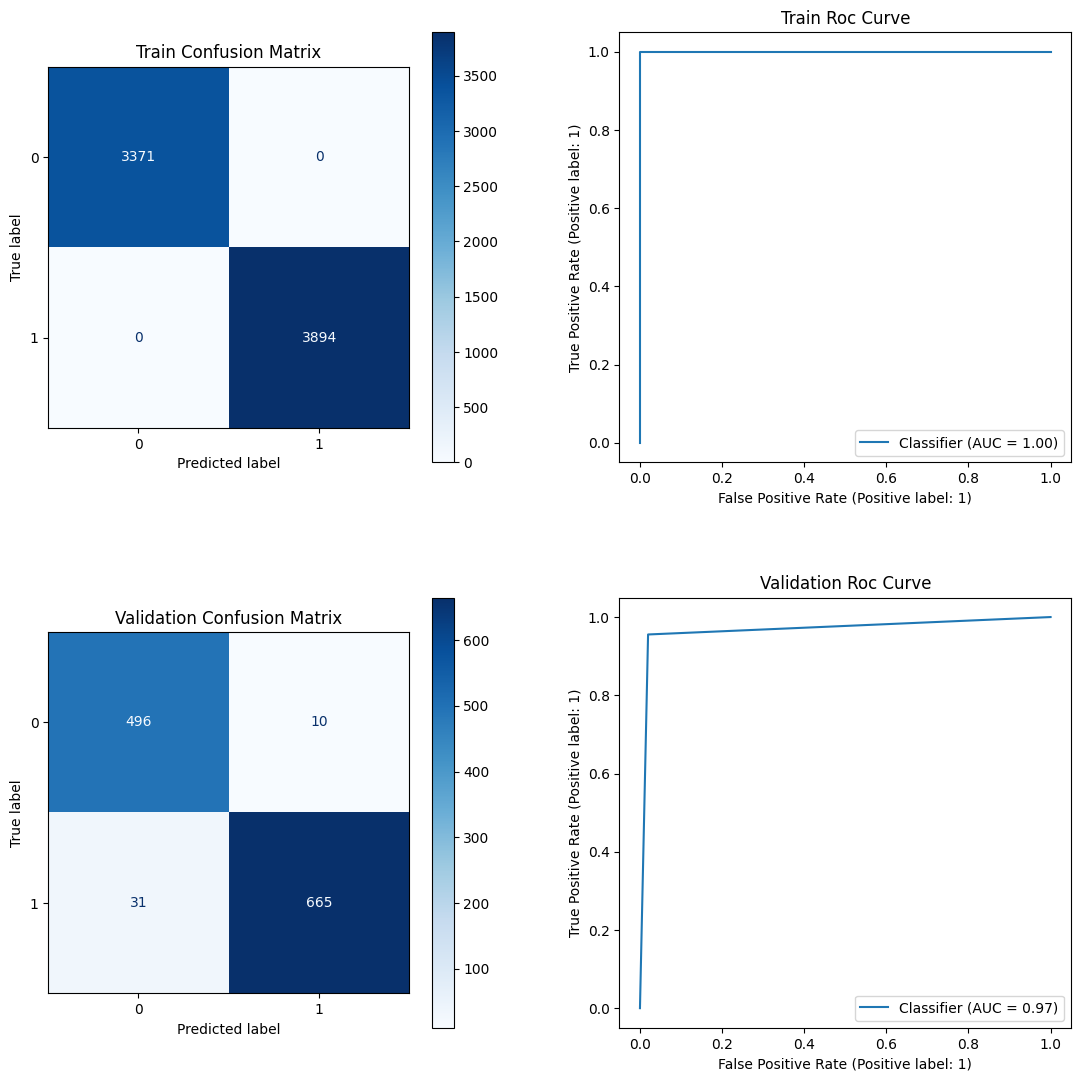

In [ ]:
xgb = XGBClassifier(random_state=8)
xgb.fit(X_train_final, y_train_final)

results = pre_result_calculator(best_models[6], xgb)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

## Results

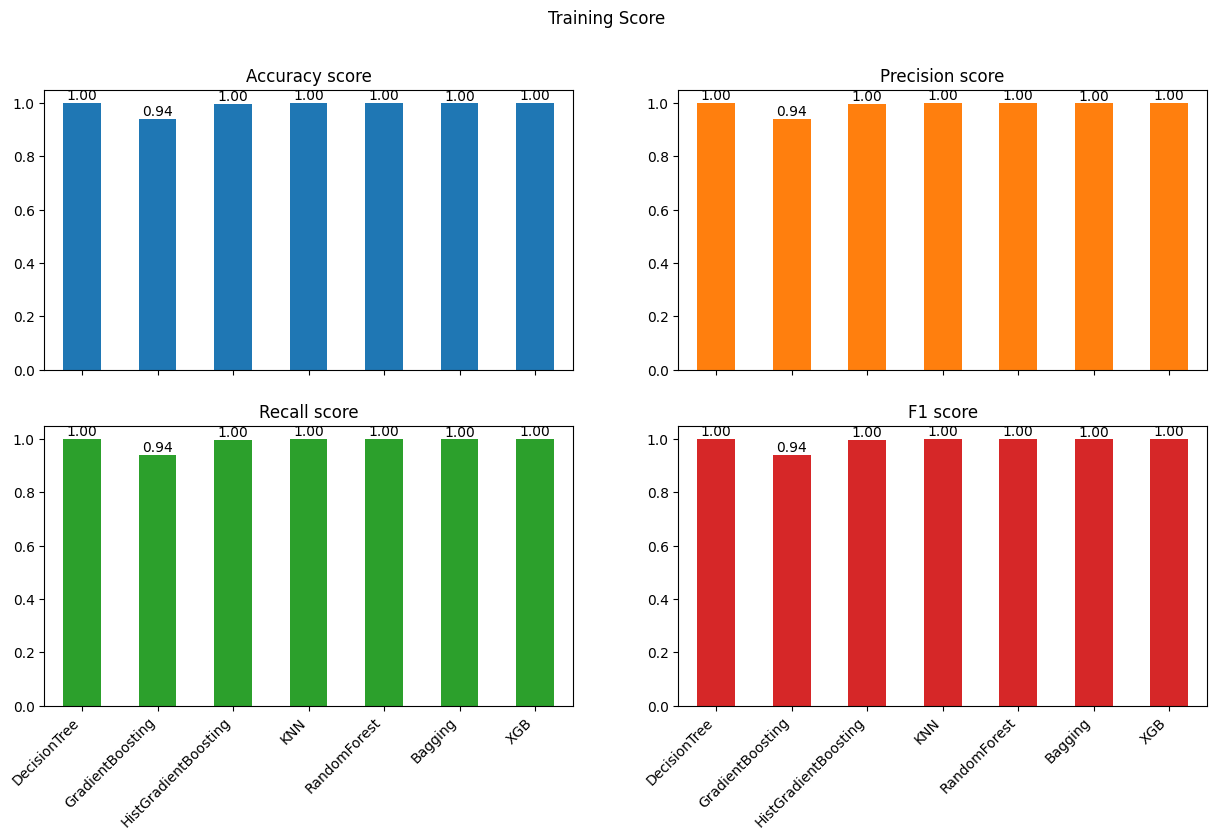

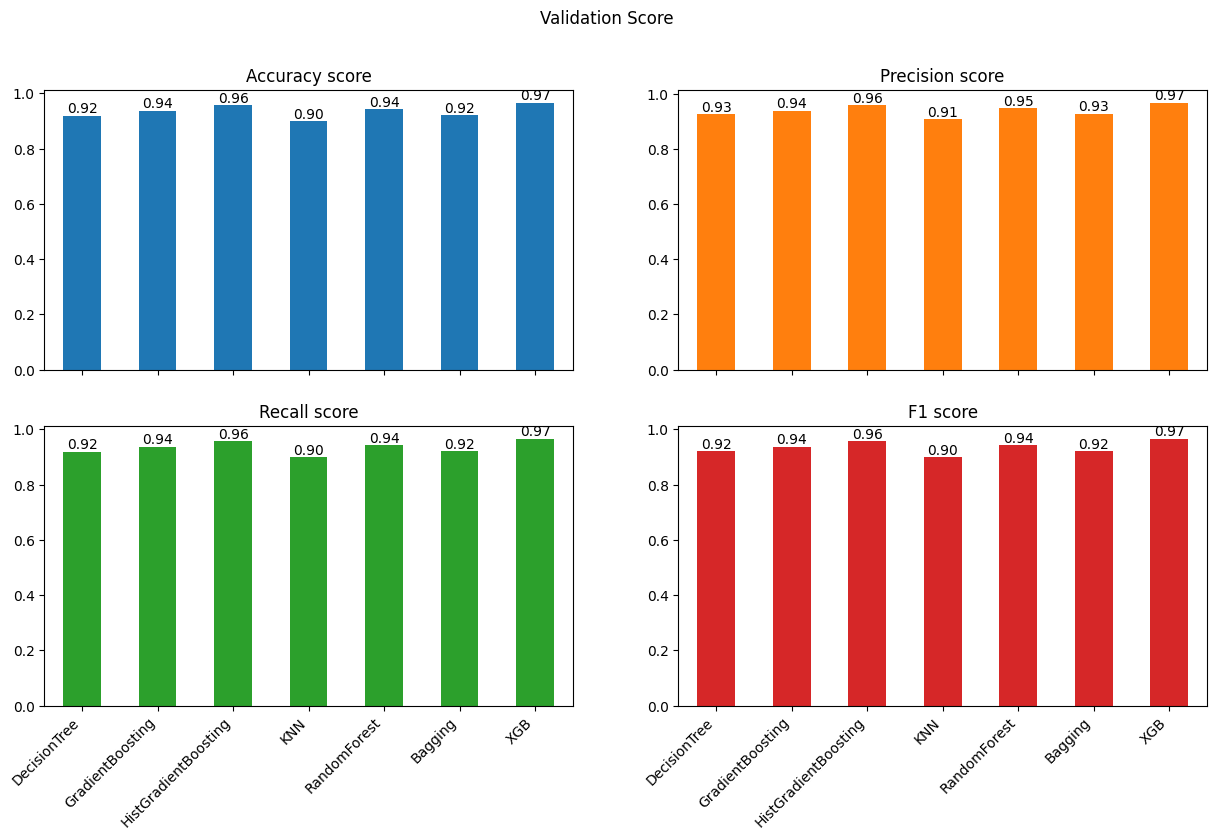

In [ ]:
# @title Graph

ax = pd.DataFrame(train_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right')

ax = pd.DataFrame(val_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right');

## Tuning/Bagging

In [ ]:
train_tuned_results, val_tuned_results = [], []

def pre_tuned_result_calculator(name, model):
    train_pred = model.predict(X_train_final)
    val_pred = model.predict(X_val_final)

    train_score = calculate_results(name, y_train_final, train_pred)
    val_score = calculate_results(name, y_val_final, val_pred)

    train_tuned_results.append(train_score)
    val_tuned_results.append(val_score)

    return (y_train_final, train_pred), \
     (y_val_final, val_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(val_score, index=[0])

### GradientBoosting Tuning

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=8)

weights = np.linspace(0.0, 0.50, 100)

params = {
    # 'loss': ['log_loss', 'exponential'],
    # 'criterion': ['friedman_mse', 'squared_error'],
    # 'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'max_features': [None, 'auto', 'sqrt'],
    'n_estimators': [100, 120, 140, 160],
}

grid = GridSearchCV(gb_tuned, params, scoring='f1', cv=StratifiedKFold(), n_jobs=-1)
grid.fit(X_train_final, y_train_final)
gb_tuned = grid.best_estimator_
gb_tuned

GradientBoostingClassifier(max_depth=5, n_estimators=160, random_state=8)

In [ ]:
GradientBoostingClassifier().get_params()

In [ ]:
print(GradientBoostingClassifier.__doc__)

              Model Name  Accuracy score  Precision score  Recall score  \
0  GradientBoostingTuned        0.995733         0.995733      0.995733   

   F1 score  
0  0.995733  
              Model Name  Accuracy score  Precision score  Recall score  \
0  GradientBoostingTuned        0.959235         0.960467      0.959235   

   F1 score  
0  0.959361  


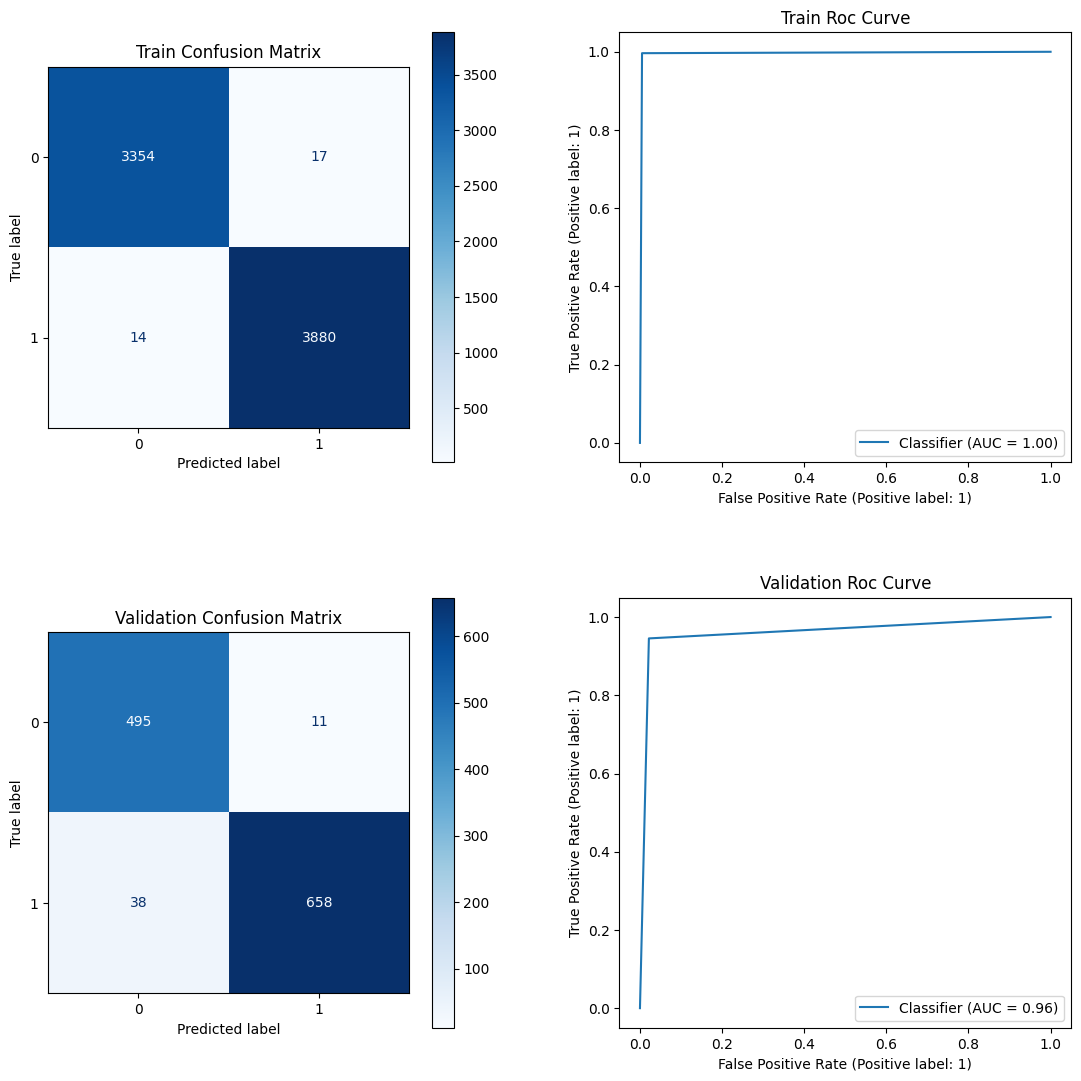

In [ ]:
gb_tuned.fit(X_train_final, y_train_final)
results = pre_tuned_result_calculator(best_models[1]+'Tuned', gb_tuned)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Bagging with GradientBoosting Tuned

                     Model Name  Accuracy score  Precision score  \
0  BaggingGradientBoostingTuned        0.992154         0.992154   

   Recall score  F1 score  
0      0.992154  0.992154  
                     Model Name  Accuracy score  Precision score  \
0  BaggingGradientBoostingTuned        0.956739         0.957754   

   Recall score  F1 score  
0      0.956739   0.95686  


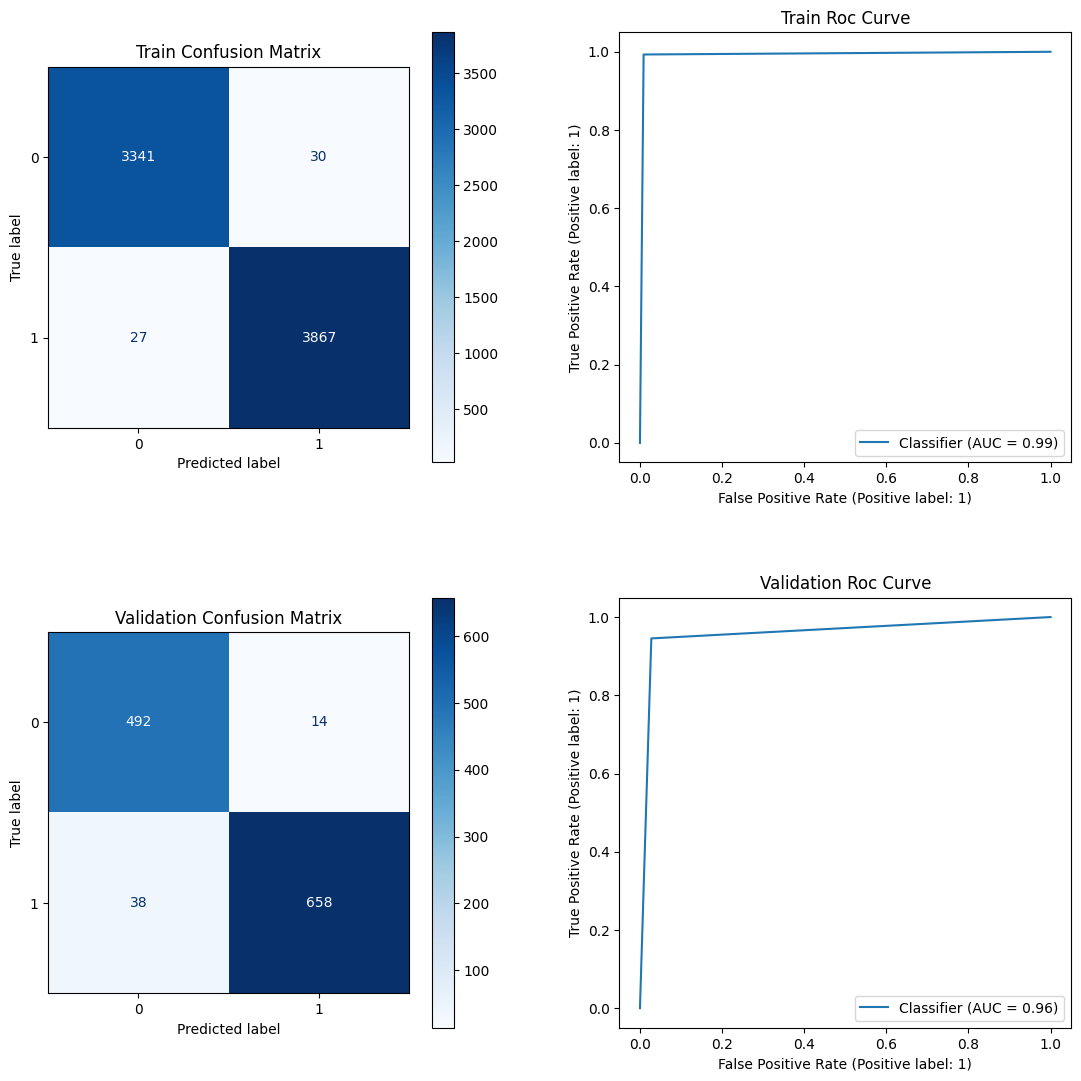

In [ ]:
bg_gb_tuned = BaggingClassifier(estimator=gb_tuned, random_state=8)
bg_gb_tuned.fit(X_train_final, y_train_final)

results = pre_tuned_result_calculator(best_models[-2]+best_models[1]+'Tuned', bg_gb_tuned)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Bagging with HistGradientBoosting

                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting        0.994907         0.994907      0.994907   

   F1 score  
0  0.994907  
                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting        0.954243         0.955843      0.954243   

   F1 score  
0  0.954402  


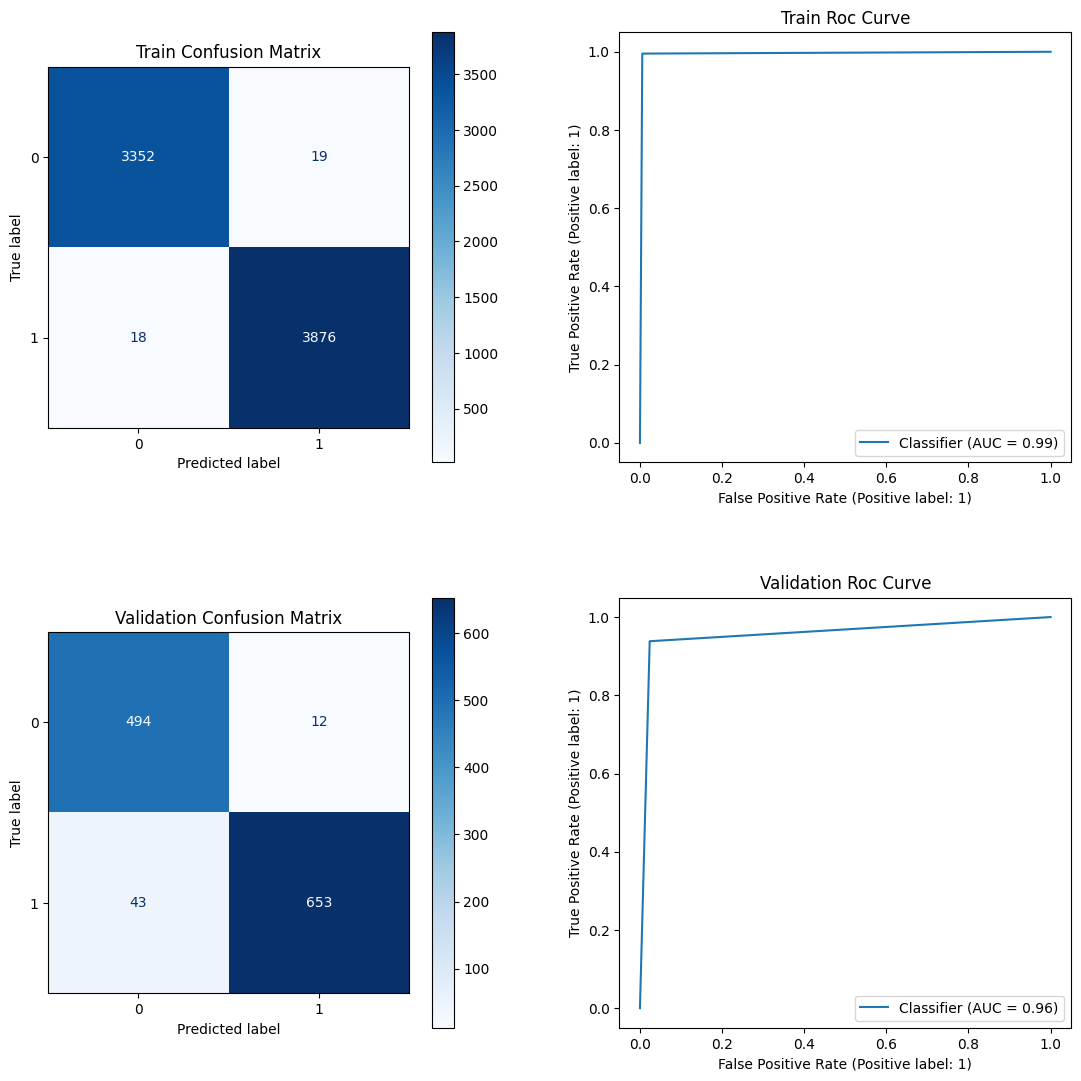

In [ ]:
bg_hgb = BaggingClassifier(estimator=hgb, random_state=8)
bg_hgb.fit(X_train_final, y_train_final)

results = pre_tuned_result_calculator(best_models[5]+best_models[2], bg_hgb)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Bagging with RandomForest

                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting        0.998761         0.998763      0.998761   

   F1 score  
0  0.998761  
                    Model Name  Accuracy score  Precision score  Recall score  \
0  BaggingHistGradientBoosting        0.936772         0.941515      0.936772   

   F1 score  
0  0.937105  


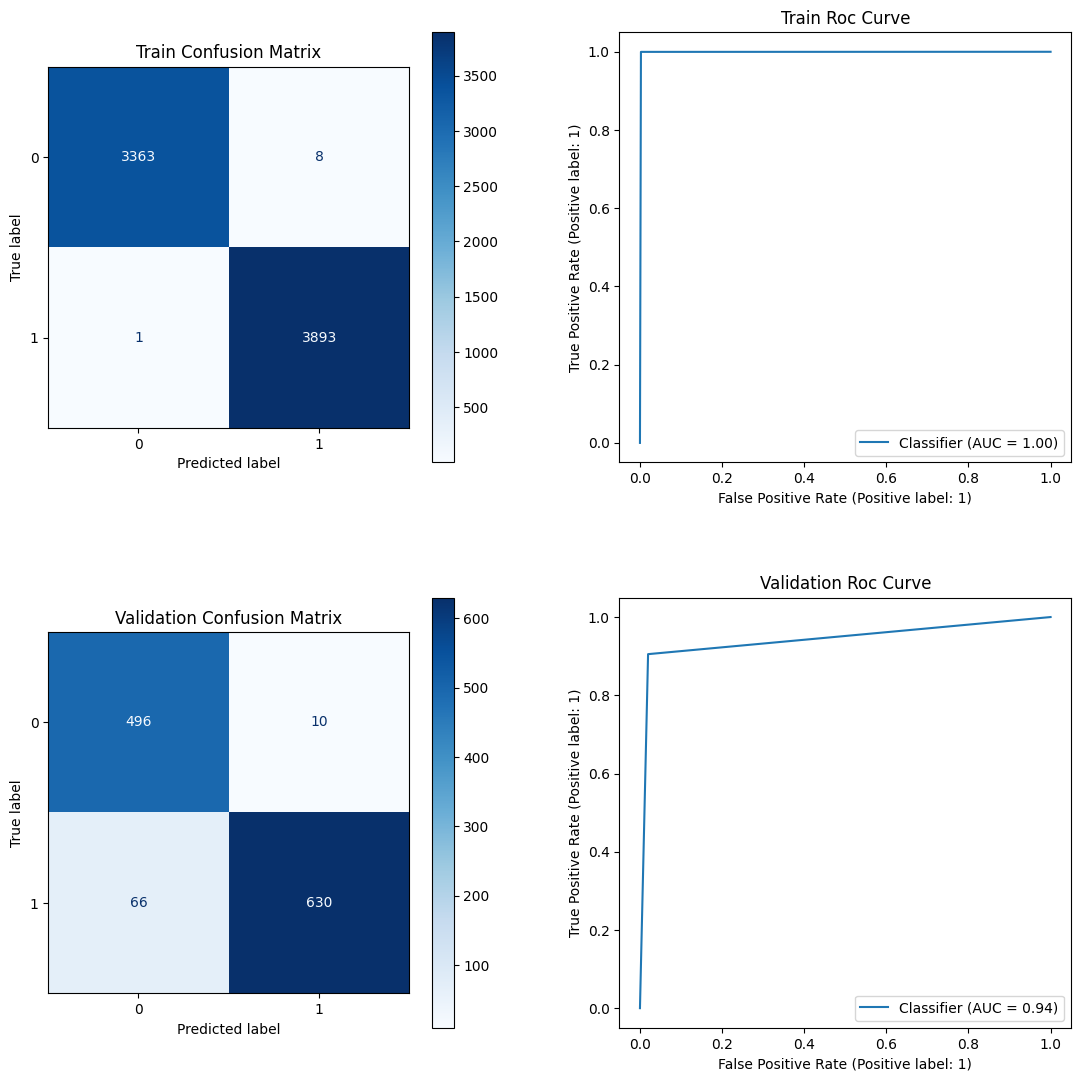

In [ ]:
bg_rf = BaggingClassifier(estimator=rf, random_state=8)
bg_rf.fit(X_train_final, y_train_final)

results = pre_tuned_result_calculator(best_models[5]+best_models[4], bg_rf)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Bagging with XGB

   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  BaggingXGB        0.998899         0.998899      0.998899  0.998899
   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  BaggingXGB        0.963394          0.96424      0.963394   0.96349


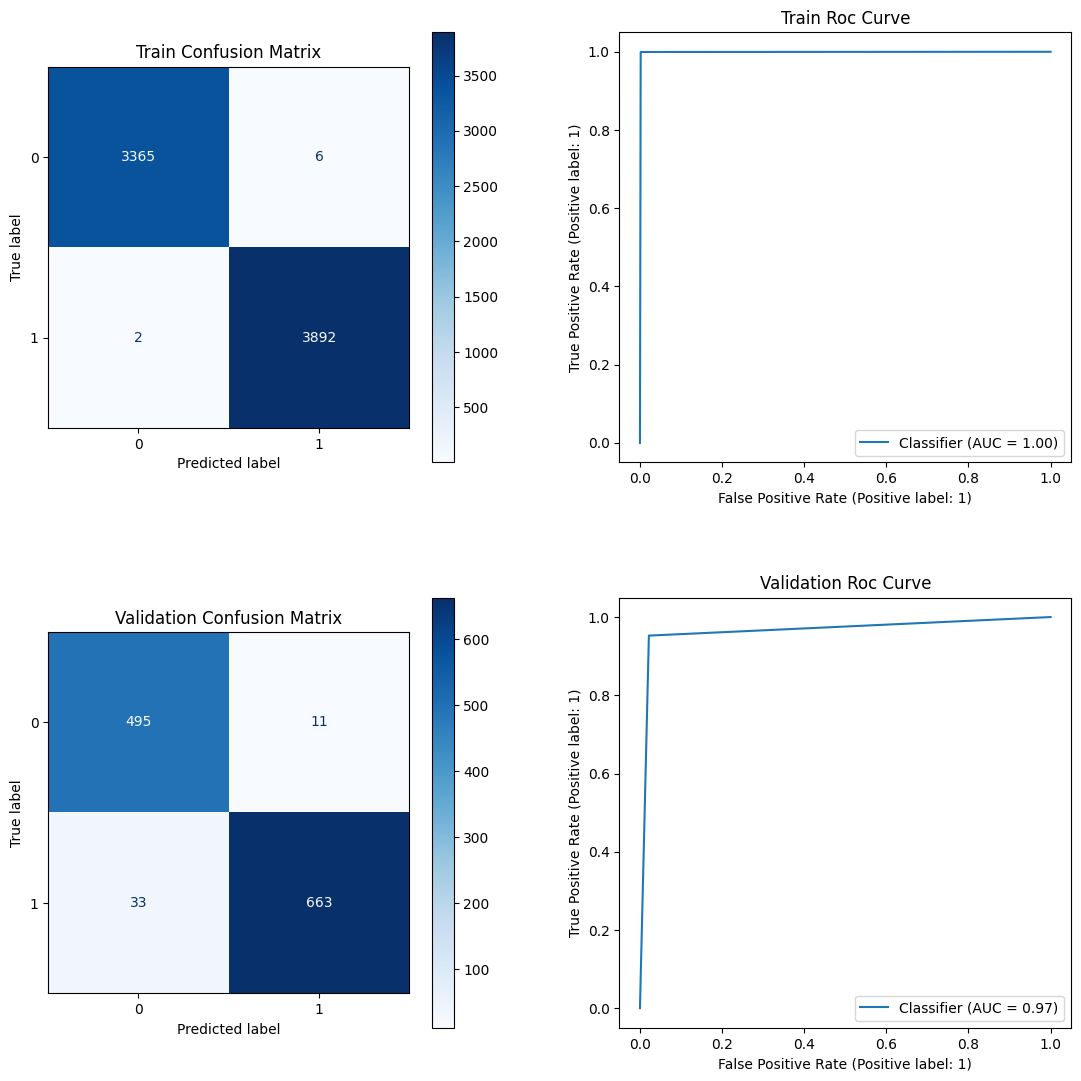

In [ ]:
bg_xgb = BaggingClassifier(estimator=xgb, random_state=8)
bg_xgb.fit(X_train_final, y_train_final)

results = pre_tuned_result_calculator(best_models[5]+best_models[-1], bg_xgb)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

## Checking the results

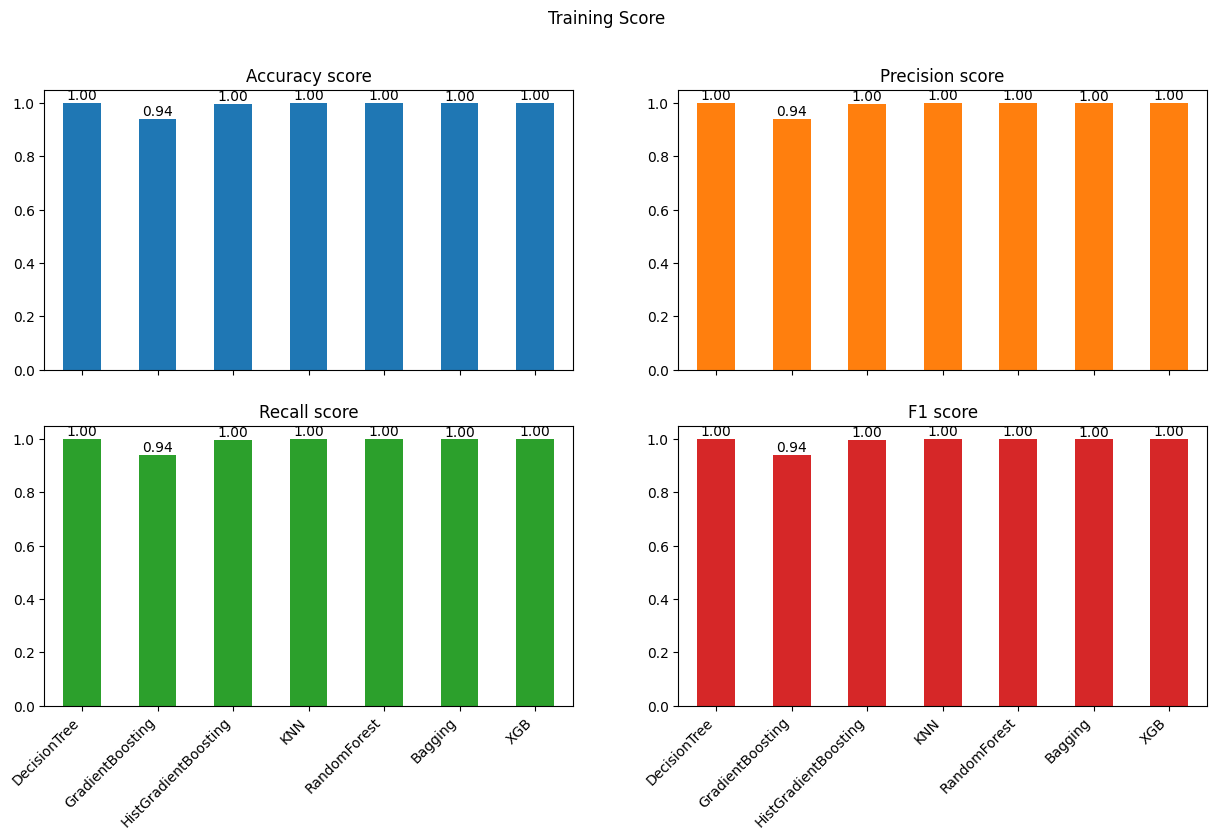

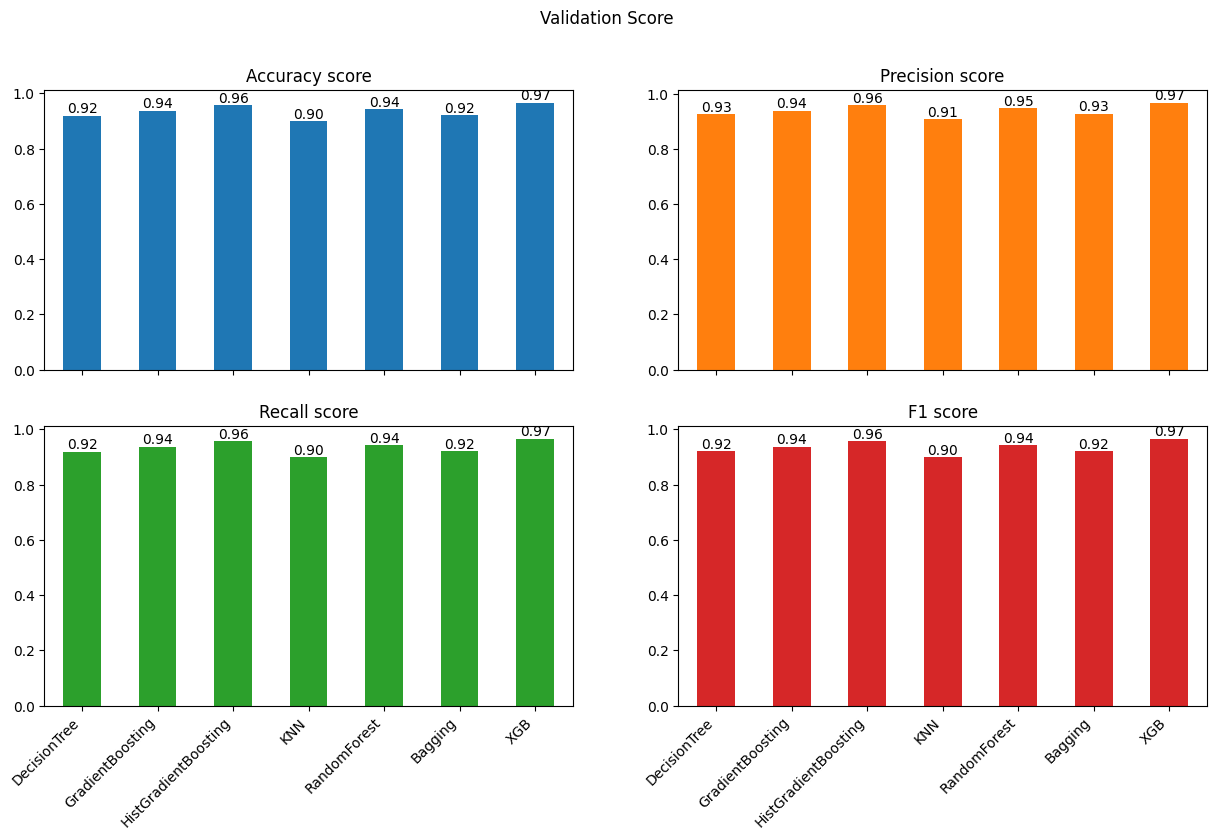

In [ ]:
# @title Non-tuned results

ax = pd.DataFrame(train_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right')

ax = pd.DataFrame(val_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(best_models, rotation=45, ha='right');

In [ ]:
model_names = [result['Model Name'] for result in train_tuned_results]

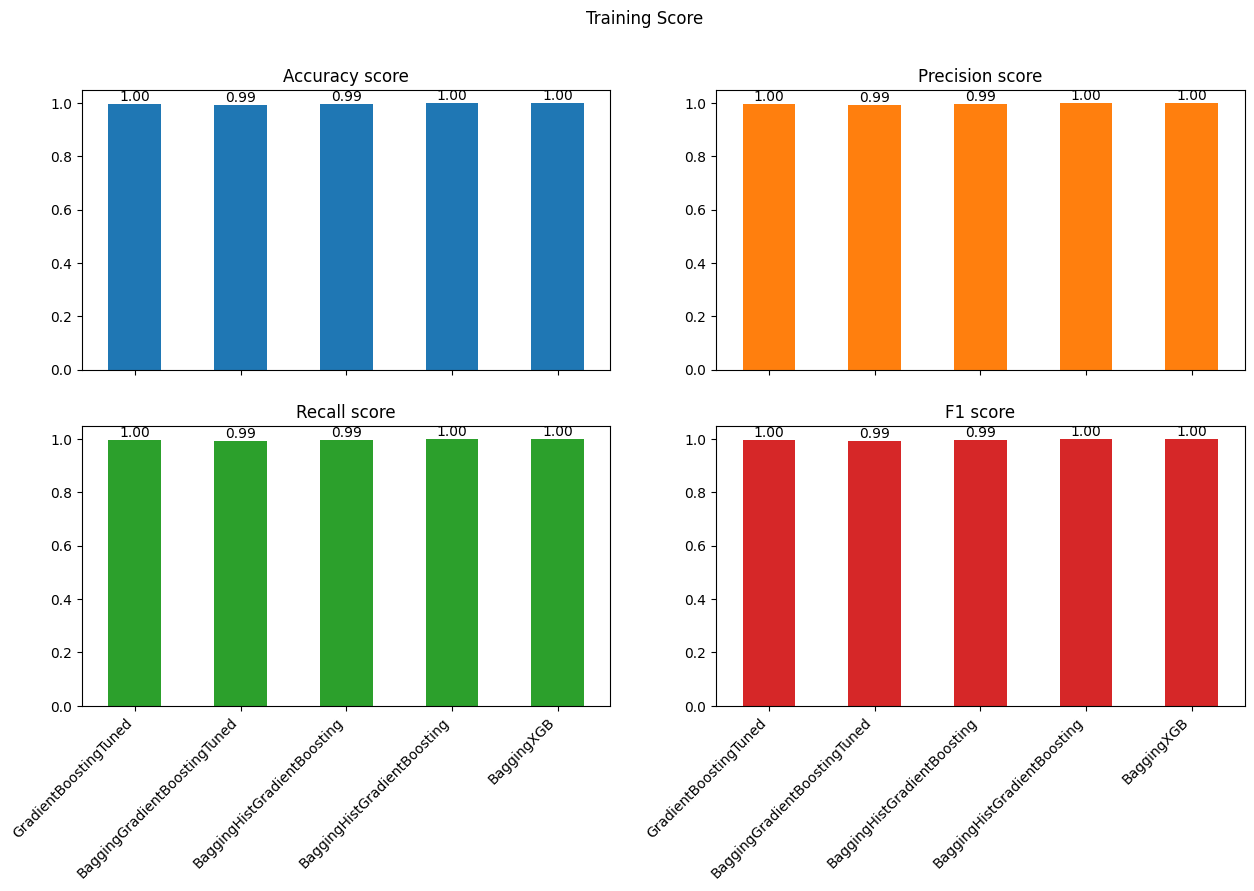

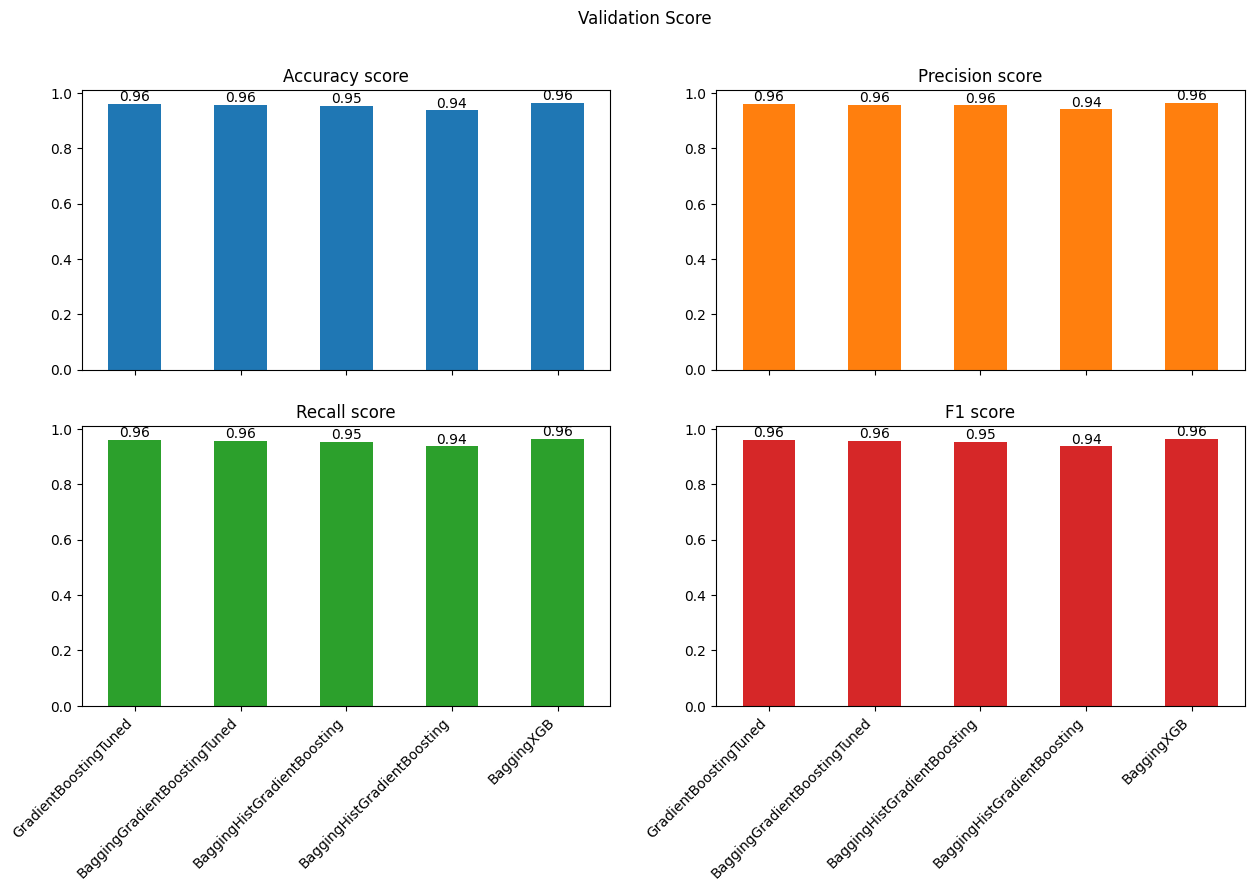

In [ ]:
# @title Tuned result Graph

ax = pd.DataFrame(train_tuned_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(model_names, rotation=45, ha='right')

ax = pd.DataFrame(val_tuned_results).plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 8), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(model_names, rotation=45, ha='right');

In [ ]:
pd.DataFrame(val_results).sort_values('F1 score')

Model Name  Accuracy score  Precision score  Recall score  \
3                   KNN        0.899334         0.907548      0.899334   
0          DecisionTree        0.920133         0.925599      0.920133   
5               Bagging        0.920965         0.927961      0.920965   
1      GradientBoosting        0.936772         0.938378      0.936772   
4          RandomForest        0.942596         0.946859      0.942596   
2  HistGradientBoosting        0.956739         0.957905      0.956739   
6                   XGB        0.965890         0.966659      0.965890   

   F1 score  
3  0.899941  
0  0.920569  
5  0.921426  
1  0.936986  
4  0.942888  
2  0.956869  
6  0.965976

In [ ]:
pd.DataFrame(val_tuned_results).sort_values('F1 score')

Model Name  Accuracy score  Precision score  \
3           BaggingRandomForest        0.936772         0.941515   
2   BaggingHistGradientBoosting        0.954243         0.955843   
1  BaggingGradientBoostingTuned        0.956739         0.957754   
0         GradientBoostingTuned        0.959235         0.960467   
4                    BaggingXGB        0.963394         0.964240   

   Recall score  F1 score  
3      0.936772  0.937105  
2      0.954243  0.954402  
1      0.956739  0.956860  
0      0.959235  0.959361  
4      0.963394  0.963490

## Stacking results function

In [ ]:
train_stacking_results, val_stacking_results = [], []

def pre_stacking_result_calculator(name, model):
    train_pred = model.predict(X_train_final)
    val_pred = model.predict(X_val_final)

    train_score = calculate_results(name, y_train_final, train_pred)
    val_score = calculate_results(name, y_val_final, val_pred)

    train_stacking_results.append(train_score)
    val_stacking_results.append(val_score)

    return (y_train_final, train_pred), \
     (y_val_final, val_pred), \
     pd.DataFrame(train_score, index=[0]), \
     pd.DataFrame(val_score, index=[0])

## Stacking Classifier

### Stacking 1

   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  Estimator1        0.999587         0.999587      0.999587  0.999587
   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  Estimator1        0.945092         0.947894      0.945092  0.945331


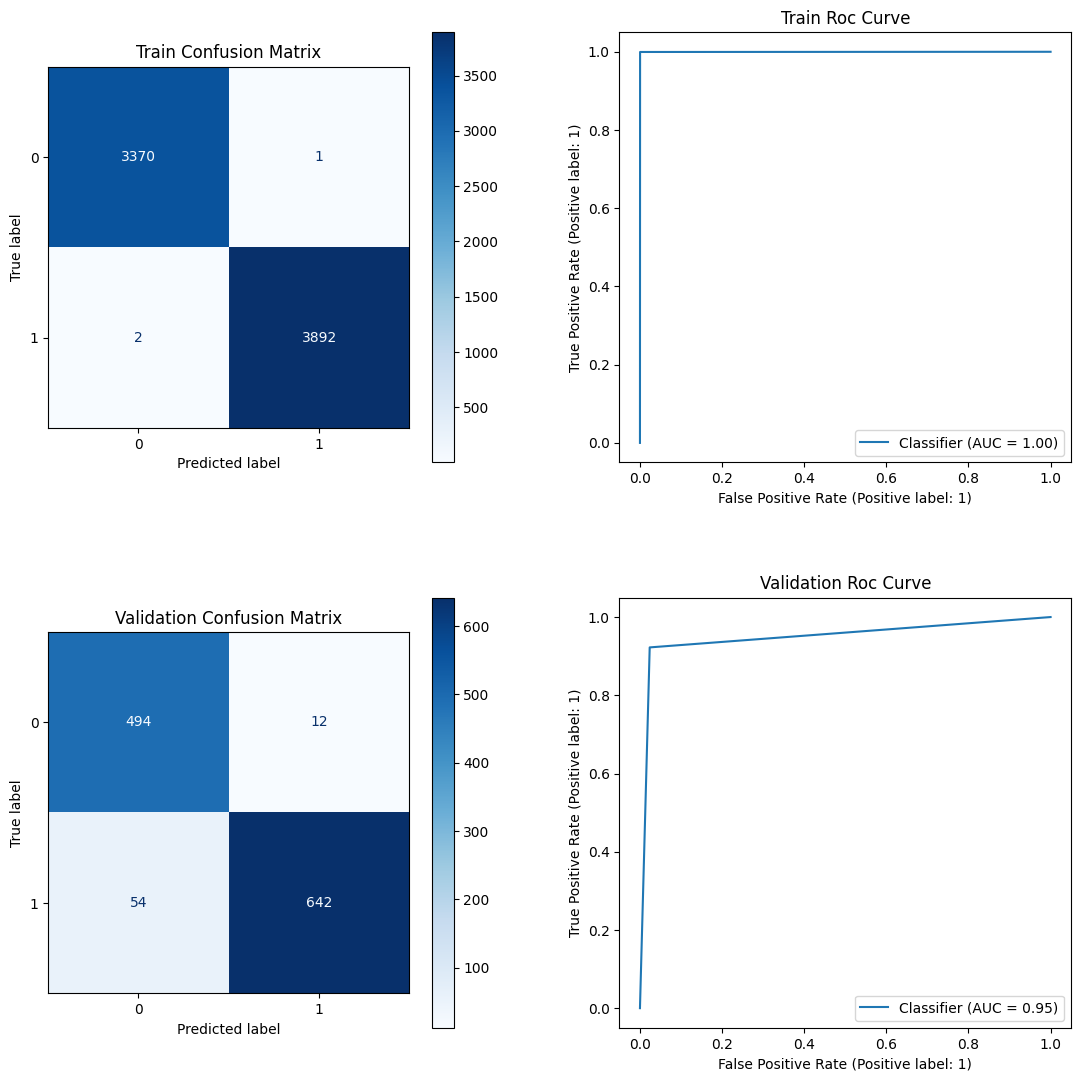

In [ ]:
estimators1 = [
    ('random_forest', rf),
    ('HistGradientBoosting', hgb),
]

final_estimator = xgb

stacking_clf1 = StackingClassifier(estimators1, final_estimator, cv=StratifiedKFold(), n_jobs=-1)
stacking_clf1.fit(X_train_final, y_train_final)

results = pre_stacking_result_calculator('Estimator1', stacking_clf1)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

### Stacking 2

   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  Estimator2        0.998211         0.998211      0.998211  0.998211
   Model Name  Accuracy score  Precision score  Recall score  F1 score
0  Estimator2        0.952579         0.954374      0.952579  0.952752


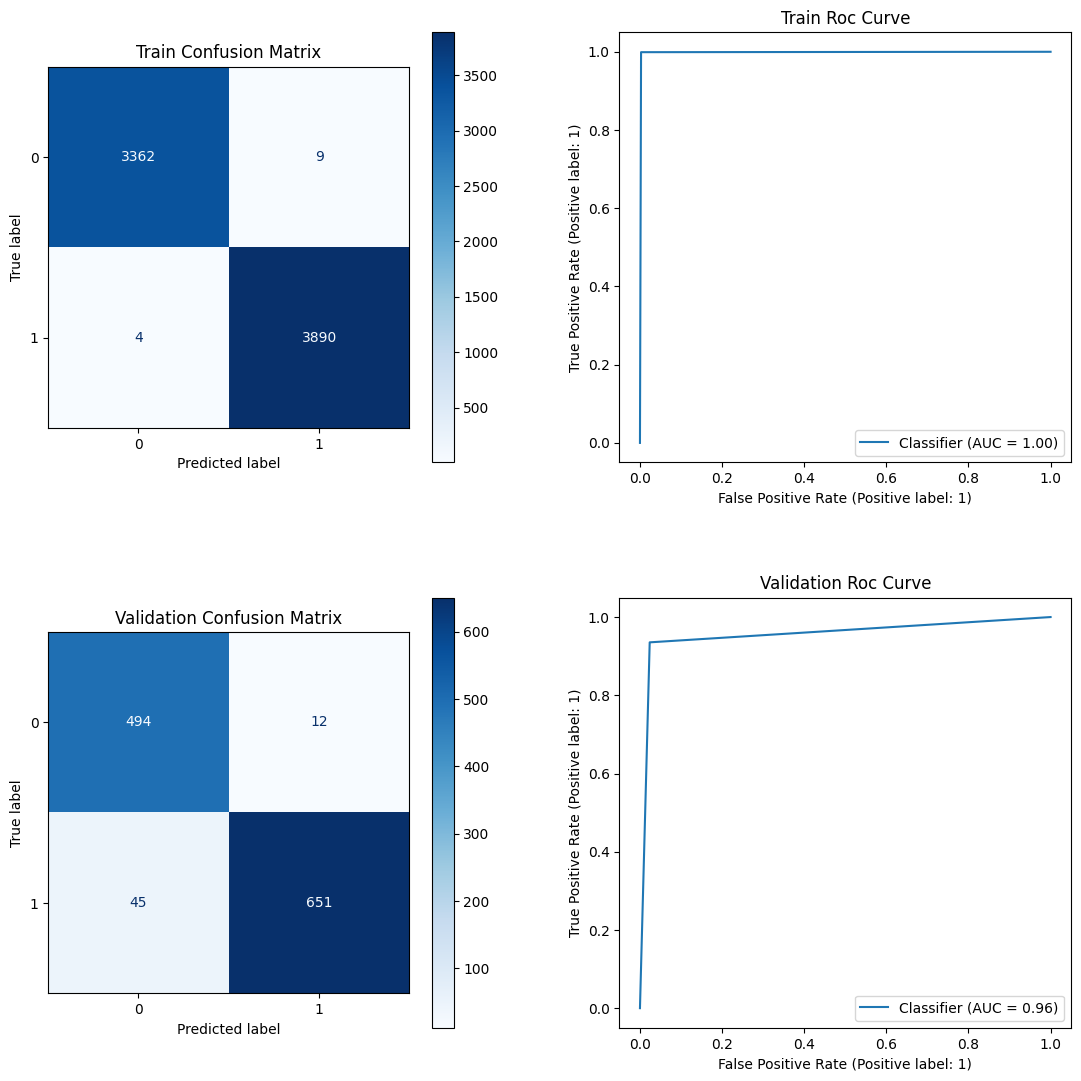

In [ ]:
estimators2 = [
    ('BaggingGradientBoostingTuned', bg_gb_tuned),
    ('GradientBoostingTuned', gb_tuned),
    ('BaggingXGB', bg_xgb),
]

final_estimator = xgb

stacking_clf2 = StackingClassifier(estimators2, final_estimator, cv=StratifiedKFold(), n_jobs=-1)
stacking_clf2.fit(X_train_final, y_train_final)

results = pre_stacking_result_calculator('Estimator2', stacking_clf2)
train, val = results[0], results[1]
train_score, val_score = results[2], results[3]

print(train_score)
print(val_score)
plot(train, val)

## Stacking Results

In [ ]:
stacking_model_names = [result['Model Name'] for result in train_stacking_results]

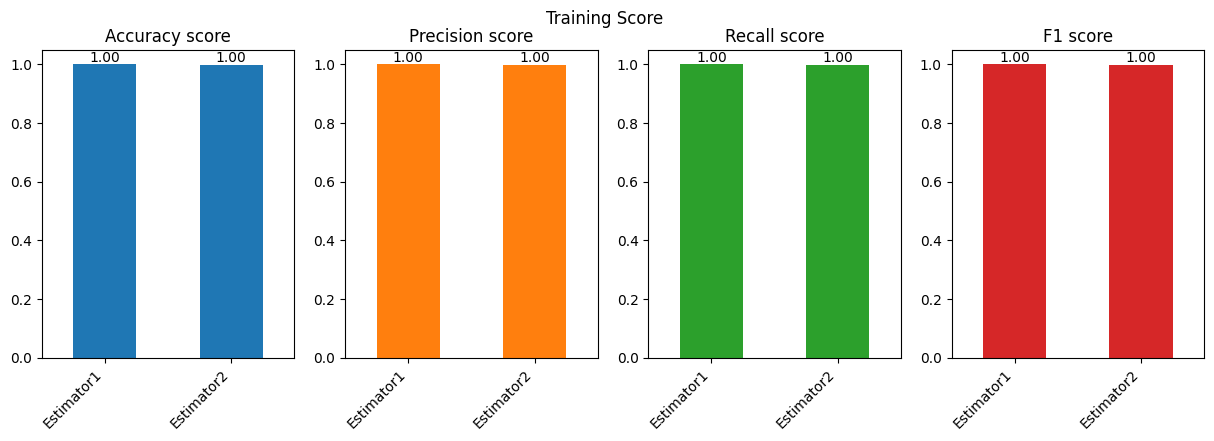

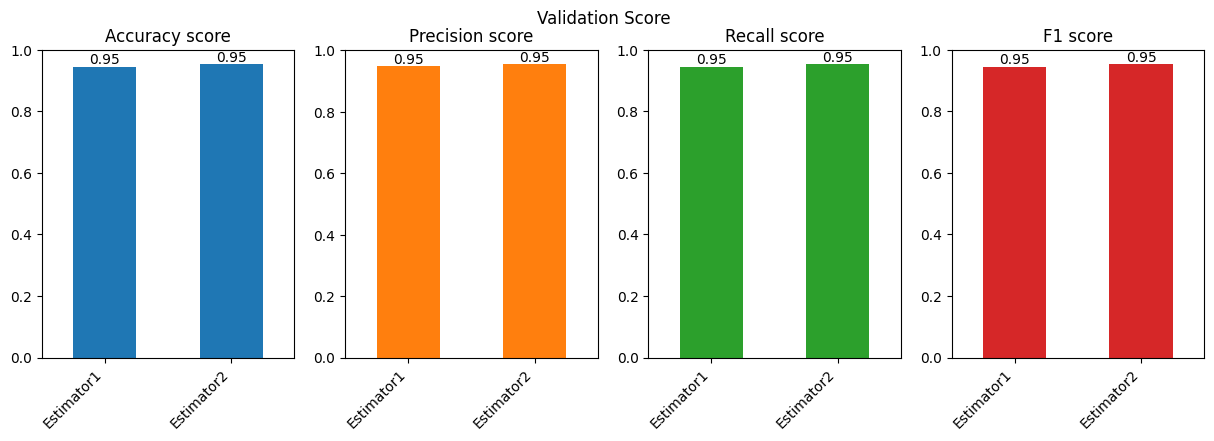

In [148]:
# @title Stacking result Graph

ax = pd.DataFrame(train_stacking_results).plot(kind='bar', subplots=True, layout=(1, 4), figsize=(15, 4), title='Training Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(stacking_model_names, rotation=45, ha='right')

ax = pd.DataFrame(val_stacking_results).plot(kind='bar', subplots=True, layout=(1, 4), figsize=(15, 4), title='Validation Score')
ax = ax.flatten()
for axes in ax:
    axes.get_legend().remove()
    axes.bar_label(axes.containers[0], fmt='%.2f')
    axes.set_xticklabels(stacking_model_names, rotation=45, ha='right');

# **Conclusion:**

> It is found that model `XGBClassifier` provided the best results.

## Plotting once again the best model results

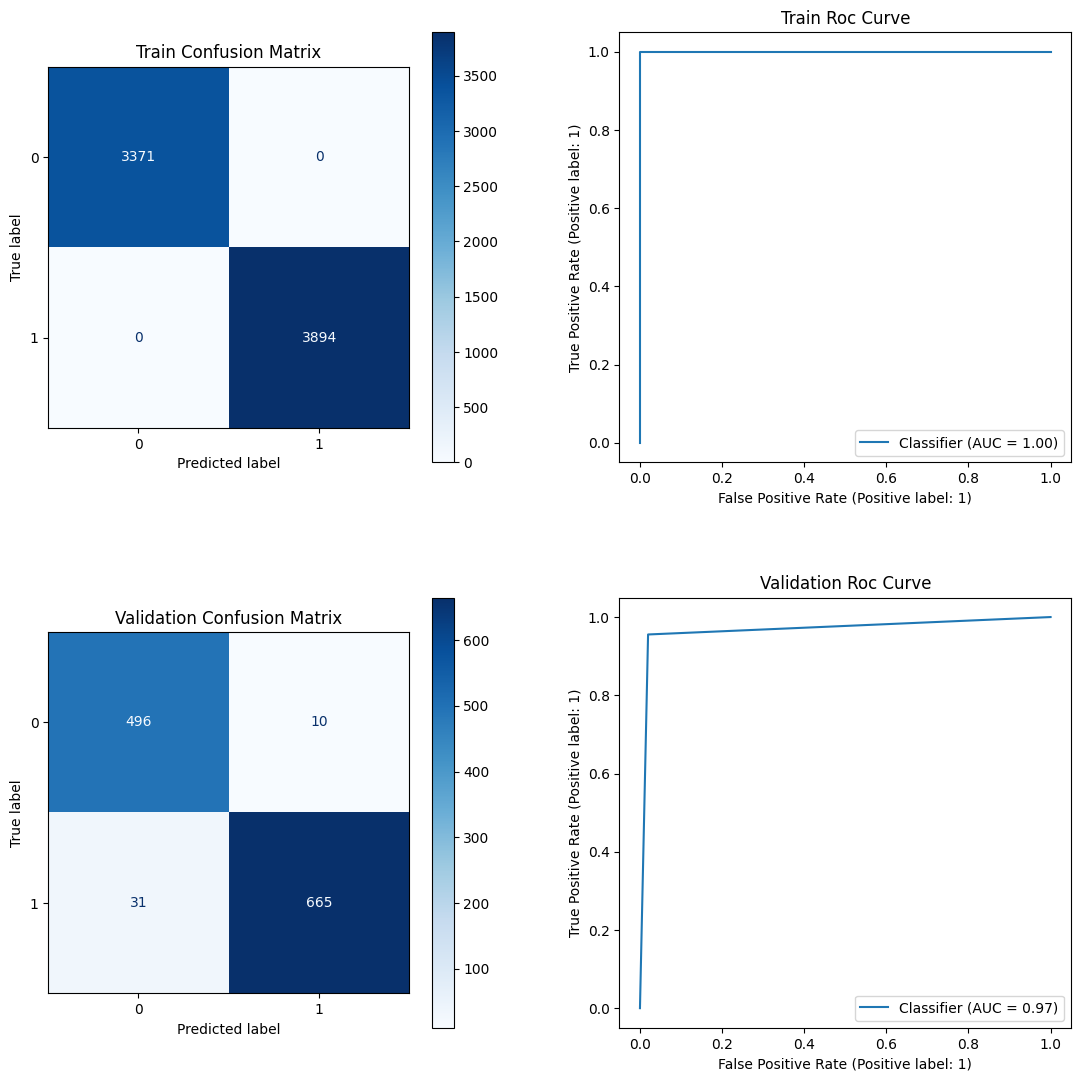

In [ ]:
train_pred = xgb.predict(X_train_final)
val_pred = xgb.predict(X_val_final)

train = (y_train_final, train_pred)
val = (y_val_final, val_pred)

plot(train, val)

## Saving the best model

In [ ]:
import joblib

filepath = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/2. Customer Churn/best_model.joblib'

filename = joblib.dump(xgb, filepath)
filename

['/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/1. ClassificationProjects/2. Customer Churn/best_model.joblib']

## Loading the saved model and plotting the result

In [ ]:
saved_model = joblib.load(filename[0])

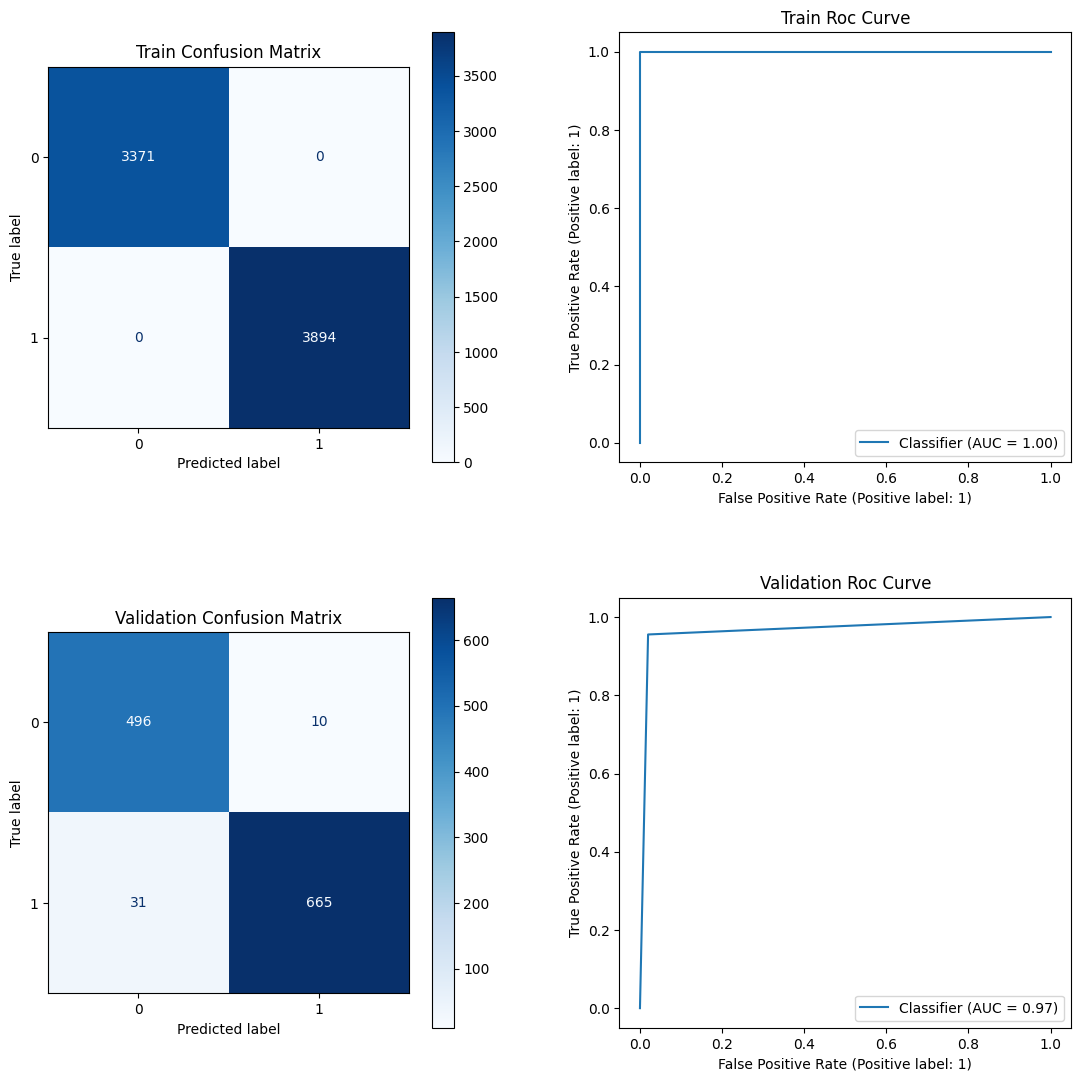

In [146]:
train_pred = saved_model.predict(X_train_final)
val_pred = saved_model.predict(X_val_final)

train = (y_train_final, train_pred)
val = (y_val_final, val_pred)

plot(train, val)

---
---